In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

import perturbseq as perturb
import sc_eVIP

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()
sc.set_figure_params(figsize=(4,4),dpi=200)

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/


In [4]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.analysis.regress_out_vbc.h5ad',cache=False)
adata

Only considering the two last: ['.regress_out_vbc', '.h5ad'].
Only considering the two last: ['.regress_out_vbc', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58I', 'KRAS

In [5]:
for x in ['KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58I', 'KRAS_T74A', 'KRAS_V14I', 'KRAS_V14L', 'KRAS_WT', 'KRAS_p.Al130VlCT', 'KRAS_p.Al155Gly.464CG', 'KRAS_p.Al66Al.198AG', 'KRAS_p.Asp173Asp.519TC', 'KRAS_p.Asp30Asp.90CT', 'KRAS_p.Cys185Tyr.554GA', 'KRAS_p.Gly75Al.224GC', 'KRAS_p.Gly77Al.230GC', 'KRAS_p.Lys169Lys.507GA', 'KRAS_p.Lys178Lys.534AG', 'KRAS_p.Lys179Ar.536AG', 'KRAS_p.Lys88Lys.264AG', 'KRAS_p.Me170Leu.508AT', 'KRAS_p.Phe141Leu', 'KRAS_p.Ser136AsnGA', 'KRAS_p.Ser17Ser.51TC', 'KRAS_p.Thr127Thr.381AG', 'KRAS_p.Thr144Thr.432AG', 'KRAS_p.Thr158Thr.474AG', 'KRAS_p.Thr20Thr.60GA', 'KRAS_p.Thr50Thr.150CG', 'KRAS_p.Thr74Thr.222TC', 'KRAS_p.Vl112Ile.334GA', 'KRAS_p.Vl8Vl.24AG']:
    del adata.obs[x]
adata

AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'batch', 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'known_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
del adata.obsp['connectivities']
del adata.obsp['distances']

In [7]:
PROTEIN='KRAS'
cells2guide_file='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-07-09/'+PROTEIN+'/processed_data/A549.'+PROTEIN+'.anno.vbc_TPTfiltered1.0_umi_counts.mut_std.gz'
cell2guide=pd.read_csv(cells2guide_file)
cell2guide.head()

G60S  G60D  G13C  P34R  G13E  N26Y  Q61P  K147T  AG11TD  A146T  ...  G12D  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0     0.0    0.0  ...   0.0   
1   0.0   0.0   0.0   1.0   0.0   0.0   0.0    0.0     0.0    0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0     0.0    0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0     0.0    0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0     1.0    0.0  ...   0.0   

   T158A  T20M  G77A  Q61K  S136N  V14L  R149K  Y166H                  cell  
0    0.0   0.0   0.0   0.0    0.0   0.0    0.0    0.0  GCAATCAGTCAGAAGCch31  
1    0.0   0.0   0.0   0.0    0.0   0.0    0.0    0.0  AAGTCTGAGACCCACCch26  
2    0.0   0.0   0.0   0.0    0.0   0.0    0.0    0.0  GTTCATTGTCCTCGTCch19  
3    0.0   0.0   0.0   0.0    0.0   0.0   15.0    0.0  TTGCCGTGTGGTGTAGch31  
4    0.0   0.0   0.0   0.0    0.0   0.0    0.0    0.0  CCACCTAAGAAGGACAch22  

[5 rows x 99 columns]

In [8]:
new_obs_names=[]
for i in range(adata.n_obs):
    old_name=adata.obs_names[i]
    items=old_name.split('-')
    new_name=items[0]+'ch'+items[3]
    new_obs_names.append(new_name)
adata.obs_names=new_obs_names

In [9]:
perturb.io.read_perturbations_csv(adata,cell2guide_csv=cells2guide_file,sep=',')

adata cells: 150044
annotated cells: 153365 or 77.0 percent of adata


In [10]:
adata.obs['variant']=adata.obs['guide.compact']
adata.obs['variant.full']=adata.obs['guide']

In [11]:
perturb.pp.perturbs_per_cell(adata,perturbations_obs='variant')
perturb.pp.cells_per_perturb(adata,perturbations_obs='variant')

Found 98/98 
Found 98/98 perturbations


In [12]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.h5ad')

... storing 'guide' as categorical
... storing 'guide.compact' as categorical
... storing 'variant' as categorical
... storing 'variant.full' as categorical


In [13]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.h5ad',cache=False)
adata

Only considering the two last: ['.allcells', '.h5ad'].
Only considering the two last: ['.allcells', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'batch', 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'V112I', 'A130V', 'L19F', 'G13R', 'D30D', 'K5E', 'K176Q', 'Q61K', 'G12V', 'N26Y', 'K117R', 'T127T', 'G13C', 'G12A', 'P34L', 'K117N', 'K179R', 'G12Y', 'G12F', 'E63K', 'G12C', 'Q22K', 'A146V', 'I36M', 'A59E', 'C185Y', 'Q61A', 'T50T', 'M170L', 'K88K', 'T158T', 'R41K', 'T144P', 'V14L', 'T50P', 'K169K', 'A146T', 'S136N', 'G7

In [14]:
cells_per_variant_singlets=np.array(adata.uns['cells_per_perturb.variant']['Number of cells']).flatten()
cells_per_variant=np.array(adata.uns['cells_per_perturb.variant.incl_multi_inf']['Number of cells']).flatten()
print(np.median(cells_per_variant_singlets))

1058.0


In [15]:
variants_per_cell=adata.obs['perturbs_per_cell.variant']

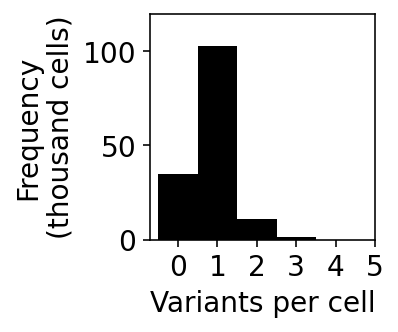

In [16]:
#put together stats into 1 plot for each


fw=2
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
a=plots.hist(variants_per_cell,range(5),color='black')
plots.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5])
plots.set_xticklabels([0,1,2,3,4,5])
plots.set_yticks([0,50000,100000])
plots.set_yticklabels([0,50,100])
plots.set_xlabel('Variants per cell')
plots.set_ylabel('Frequency\n(thousand cells)')
#plt.title('TP53')
plots.grid(False)
plots.set_ylim(0,120000)
plt.savefig(FIGS+'/'+PROTEIN+'.VariantsPerCell.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/'+PROTEIN+'.VariantsPerCell.png',bbox_inches = "tight")


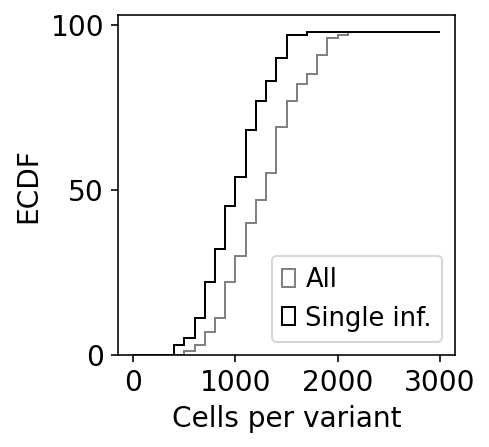

In [17]:
fw=3
fh=3

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
n, bins, patches=plots.hist(cells_per_variant,[0,100,200,300,400,500,600,700,800,900,1000,
                                    1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
                                                   2100,2200,2300,2400,2500,2600,2700,2800,2900,3000],
            cumulative=True,histtype='step',color='gray',label='All') 
patches[0].set_xy(patches[0].get_xy()[:-1])
n, bins, patches=plots.hist(cells_per_variant_singlets,[0,100,200,300,400,500,600,700,800,900,1000,
                                    1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
                                                   2100,2200,2300,2400,2500,2600,2700,2800,2900,3000],
            cumulative=True,histtype='step',label='Single inf.',color='black') 
patches[0].set_xy(patches[0].get_xy()[:-1])
plots.set_xticks([0,1000,2000,3000])
plots.set_yticks([0,50,100])
plots.set_xlabel('Cells per variant')
plots.set_ylabel('ECDF')
#plots.set_title('TP53')
plt.legend(loc='lower right')
plots.grid(False)
plt.savefig(FIGS+'/'+PROTEIN+'.CellsPerVariantECDF.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/'+PROTEIN+'.CellsPerVariantECDF.png',bbox_inches = "tight")


In [18]:
FIGS

'/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/'

In [19]:
perturb.pp.get_perturbations(adata,perturbations_obs='variant')

In [20]:
def get_umis_per_vbc(adata_here,variants):
    
    #make a data frame, then sum rows and columns.
    anno=pd.DataFrame(index=list(adata_here.obs_names), columns=variants)
    
    for variant in variants:
        anno[variant]=list(adata_here.obs[variant])
        
    #take non-zero values
    vals=anno.to_numpy()
    nonzeros=vals[vals>0]
    return(nonzeros)

variants=adata.uns['PS.variant.list']
umis_per_vbc_tp53=get_umis_per_vbc(adata,variants)

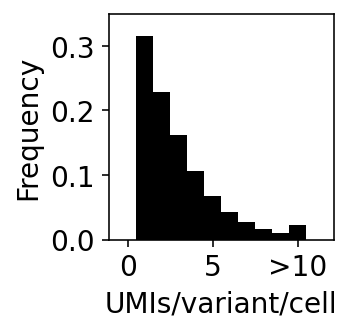

In [22]:
UPPER_BOUND=10
import copy
umis_per_vbc_tp532=copy.deepcopy(umis_per_vbc_tp53)
umis_per_vbc_tp532[umis_per_vbc_tp532>=UPPER_BOUND]=UPPER_BOUND

fw=2
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.hist(umis_per_vbc_tp532,range(UPPER_BOUND+3),
            color='black',density=True)
plots.set_xticks([0.5,5.5,UPPER_BOUND+0.5])
plots.set_yticks([0,0.1,0.2,0.3])
plots.set_ylim(0,0.35)
plots.set_xticklabels(['0','5','>10'])
plots.set_xlabel('UMIs/variant/cell')
plots.set_ylabel('Frequency')
#plots.set_title('TP53')
plots.grid(False)
plt.savefig(FIGS+'/'+PROTEIN+'.UMIsPerVbc.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/'+PROTEIN+'.UMIsPerVbc.png',bbox_inches = "tight")


In [23]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.h5ad')

In [3]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.h5ad',cache=False)
adata

Only considering the two last: ['.allcells', '.h5ad'].
Only considering the two last: ['.allcells', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'batch', 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'V112I', 'A130V', 'L19F', 'G13R', 'D30D', 'K5E', 'K176Q', 'Q61K', 'G12V', 'N26Y', 'K117R', 'T127T', 'G13C', 'G12A', 'P34L', 'K117N', 'K179R', 'G12Y', 'G12F', 'E63K', 'G12C', 'Q22K', 'A146V', 'I36M', 'A59E', 'C185Y', 'Q61A', 'T50T', 'M170L', 'K88K', 'T158T', 'R41K', 'T144P', 'V14L', 'T50P', 'K169K', 'A146T', 'S136N', 'G7

In [4]:
#plots for the supplement
perturb.pp.cells_per_perturb(adata, perturbations_obs='variant')

Found 98/98 perturbations


In [5]:
perturb.pp.obs_mean(adata,grouping_variable='variant',obs=['vbc.counts'],outpref='vbc_norm_expr')

AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'batch', 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'V112I', 'A130V', 'L19F', 'G13R', 'D30D', 'K5E', 'K176Q', 'Q61K', 'G12V', 'N26Y', 'K117R', 'T127T', 'G13C', 'G12A', 'P34L', 'K117N', 'K179R', 'G12Y', 'G12F', 'E63K', 'G12C', 'Q22K', 'A146V', 'I36M', 'A59E', 'C185Y', 'Q61A', 'T50T', 'M170L', 'K88K', 'T158T', 'R41K', 'T144P', 'V14L', 'T50P', 'K169K', 'A146T', 'S136N', 'G7

In [6]:
variants=list(adata.uns['PS.variant.list'])
variants.append('unassigned')
print(variants)

['A130V', 'A146P', 'A146T', 'A146V', 'A155G', 'A59E', 'A59G', 'A59T', 'A66A', 'AG11TD', 'AG59GV', 'C118S', 'C185Y', 'D119G', 'D173D', 'D30D', 'D33E', 'D57N', 'E31K', 'E63K', 'F141L', 'G12A', 'G12C', 'G12D', 'G12F', 'G12I', 'G12R', 'G12S', 'G12V', 'G12Y', 'G13C', 'G13E', 'G13R', 'G13V', 'G60D', 'G60S', 'G60V', 'G75A', 'G77A', 'I163S', 'I36M', 'K117N', 'K117R', 'K147N', 'K147T', 'K169K', 'K176Q', 'K178K', 'K179R', 'K5E', 'K88K', 'L159S', 'L19F', 'L52F', 'L79I', 'M111L', 'M170L', 'N26Y', 'P110S', 'P34L', 'P34R', 'Q22H', 'Q22K', 'Q25H', 'Q61A', 'Q61H', 'Q61K', 'Q61L', 'Q61P', 'Q61R', 'Q99E', 'R135T', 'R149K', 'R164Q', 'R41K', 'R68S', 'S136N', 'S17S', 'T127T', 'T144P', 'T144T', 'T158A', 'T158T', 'T20M', 'T20R', 'T20T', 'T50I', 'T50P', 'T50T', 'T58I', 'T74A', 'T74T', 'V112I', 'V14I', 'V14L', 'V8V', 'WT', 'Y166H', 'unassigned']


/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


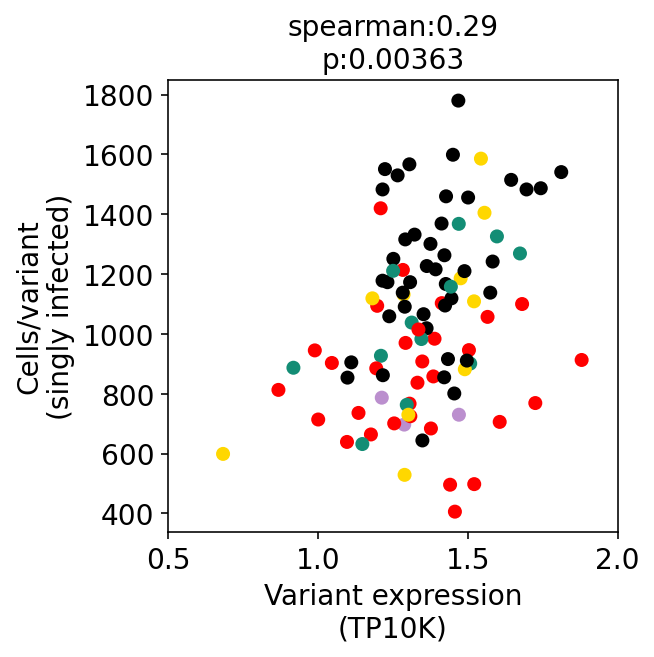

In [8]:
#average expression vs number of cells

ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t',index_col=0)

def fun_scatter(x,y,xname='x',yname='y',width=4,height=4,corrtype='spearman',
                xlim=None,ylim=None,
                **kwargs):
    from scipy.stats import spearmanr, pearsonr
    if corrtype=='spearman':
        corr=spearmanr(x,y,nan_policy='omit')
    if corrtype=='pearson':
        corr=pearsonr(x,y)
    c,p="%.2g" % corr[0],"%.3g" % corr[1]
    fig,plots=plt.subplots(1)
    fig.set_size_inches(width,height)
    plots.scatter(x,y,**kwargs)
    plots.set_xlabel(xname)
    plots.set_ylabel(yname)
    if xlim!=None:
        plots.set_xlim(xlim)
    if ylim!=None:
        plots.set_ylim(ylim)
    plots.set_title(corrtype+':'+str(c)+'\n'+'p:'+str(p))
    
fun_scatter(10000.0*adata.uns['vbc_norm_expr'].loc[variants,'vbc.counts'],
            adata.uns['cells_per_perturb.variant'].loc[variants,'Number of cells'],
           c=anno.loc[variants,'cluster_color'])
#plt.ylim(0,2500)
plt.xlim(0.5,2.0)
plt.grid(False)
plt.xlabel('Variant expression\n(TP10K)')
plt.ylabel('Cells/variant\n(singly infected)')

plt.savefig(FIGS+'/'+PROTEIN+'.vbc_expr_vs_numcells.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.vbc_expr_vs_numcells.png',bbox_inches = "tight")

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: 'M237I'

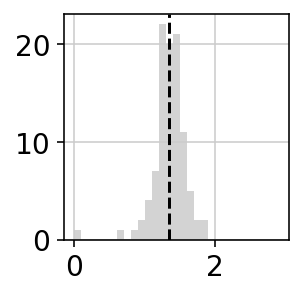

In [10]:
#histogram expression

anno['variant_expression']=(10000.0*adata.uns['vbc_norm_expr'].loc[variants,'vbc.counts']).loc[anno.index]

fig,plots=plt.subplots(1)
fig.set_size_inches(2,2)
bins=[x/10 for x in range(30)]
plots.hist(anno.loc[variants,'variant_expression'],color='lightgray',
          bins=bins)
plots.axvline(x=anno.loc['WT','variant_expression'],
             color='black',linestyle='--')
for v in ['M237I','Y236C']:
    plots.hist(anno.loc[v,
        'variant_expression'],color=anno.loc[v,'cluster_color'],bins=bins)
plots.hist(anno.loc['unassigned',
        'variant_expression'],color='slateblue',bins=bins)
plots.grid(False)
plots.set_xlabel('Variant expression\n(TP10K)',fontsize=10)
plots.set_ylabel('Number of variants',fontsize=10)

plt.savefig(FIGS+'/'+PROTEIN+'.expr_hist.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.expr_hist.png',bbox_inches = "tight")

Computing MOI and detection probability using code from Dixit et al., 2016
number of distinct perturbations 98
MOI: 0.31
Detection probability: 0.74


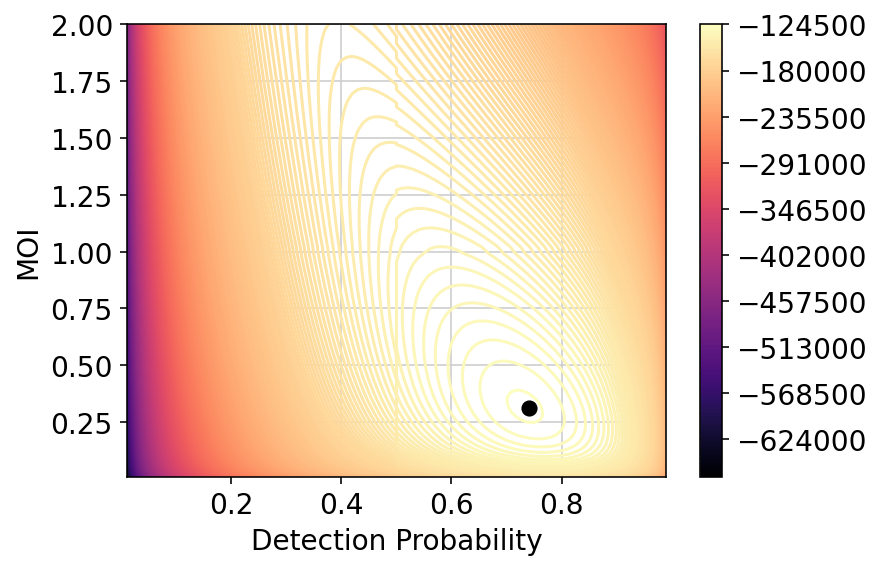

In [4]:
perturb.tl.moi(adata,perturbations_obs='variant')

In [5]:
c1=adata.obs['vbc.counts']

In [7]:
variants=adata.uns['PS.variant.list']
c2=np.divide(adata.obs.loc[:,variants].sum(axis=1),adata.obs['n_counts_original'])
c2.shape

(150044,)

In [8]:
(c1-c2).sum()

0.0

Save a low-MOI dataset as well
==

In [9]:
singles=perturb.pp.subset_singly_perturbed(adata,keep_unassigned=False,copy=True)
singles

Found 98/98 


View of AnnData object with n_obs × n_vars = 102767 × 1145 
    obs: 'batch', 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'V112I', 'A130V', 'L19F', 'G13R', 'D30D', 'K5E', 'K176Q', 'Q61K', 'G12V', 'N26Y', 'K117R', 'T127T', 'G13C', 'G12A', 'P34L', 'K117N', 'K179R', 'G12Y', 'G12F', 'E63K', 'G12C', 'Q22K', 'A146V', 'I36M', 'A59E', 'C185Y', 'Q61A', 'T50T', 'M170L', 'K88K', 'T158T', 'R41K', 'T144P', 'V14L', 'T50P', 'K169K', 'A146T', 'S13

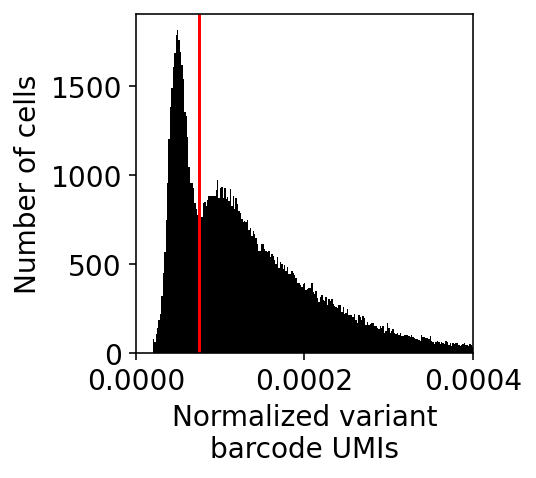

In [14]:
fw=3
fh=3

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
x=plt.hist(singles.obs['vbc.counts'],1200,color='black')
plt.axvline(x=0.000075,color='red')

plt.xlabel('Normalized variant\nbarcode UMIs')
plt.ylabel('Number of cells')
plt.xticks([0,0.0002,0.0004])
plt.xlim(0,0.0004)
plt.grid(False)
plt.savefig(FIGS+'/'+PROTEIN+'.NormUMIsPerCell_singles.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/'+PROTEIN+'.NormUMIsPerCell_singles.png',bbox_inches = "tight")


In [15]:
perturbations=adata.uns['PS.variant.list']

In [16]:
import copy
perturbs=copy.deepcopy(adata.obs.loc[:,perturbations])
perturbs=perturbs.div(adata.obs['n_counts_original'],axis='rows')

In [17]:
perturbs2=1.0*(perturbs>0.000075)

In [18]:
adata_low=adata.copy()
adata_low

AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'batch', 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'V112I', 'A130V', 'L19F', 'G13R', 'D30D', 'K5E', 'K176Q', 'Q61K', 'G12V', 'N26Y', 'K117R', 'T127T', 'G13C', 'G12A', 'P34L', 'K117N', 'K179R', 'G12Y', 'G12F', 'E63K', 'G12C', 'Q22K', 'A146V', 'I36M', 'A59E', 'C185Y', 'Q61A', 'T50T', 'M170L', 'K88K', 'T158T', 'R41K', 'T144P', 'V14L', 'T50P', 'K169K', 'A146T', 'S136N', 'G7

In [19]:
adata_low.obs.loc[:,perturbations]=perturbs2
perturbations=adata_low.uns['PS.variant.list']
perturb.pp.perturbs_per_cell(adata_low,perturbations_obs='variant')
perturb.pp.cells_per_perturb(adata_low,perturbations_obs='variant')

Found 98/98 
Found 98/98 perturbations


In [22]:
?perturb.tl.moi

Computing MOI and detection probability using code from Dixit et al., 2016
number of distinct perturbations 98
MOI: 0.19
Detection probability: 0.51


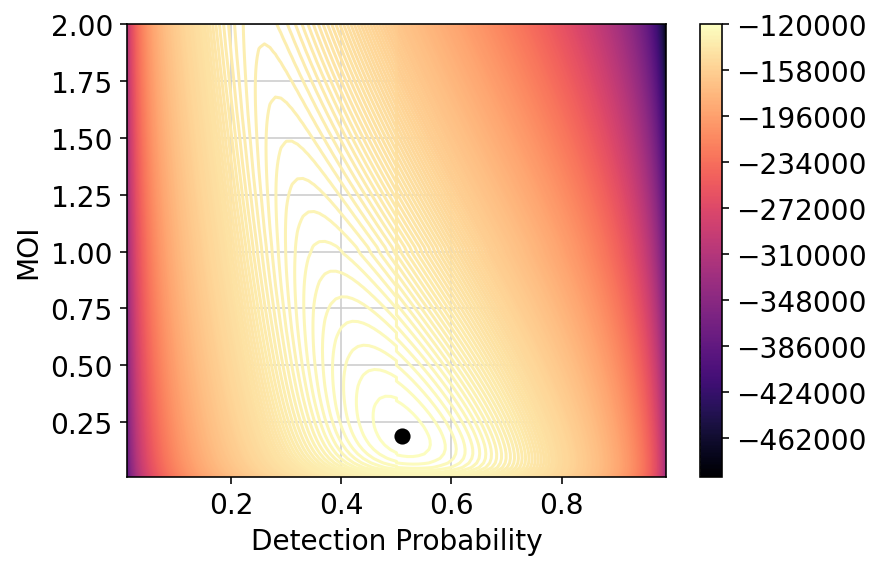

In [26]:
perturb.tl.moi(adata_low,perturbations_obs='variant',moi_max=2)

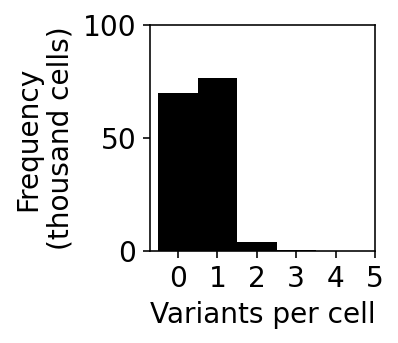

In [27]:
#put together stats into 1 plot for each

variants_per_cell=adata_low.obs['perturbs_per_cell.variant']

fw=2
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
a=plots.hist(variants_per_cell,range(5),color='black')
plots.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5])
plots.set_xticklabels([0,1,2,3,4,5])
plots.set_yticks([0,50000,100000])
plots.set_yticklabels([0,50,100])
plots.set_xlabel('Variants per cell')
plots.set_ylabel('Frequency\n(thousand cells)')
#plt.title('TP53')
plots.grid(False)
plots.set_ylim(0,100000)
plt.savefig(FIGS+'/KRAS.VariantsPerCell.lowMOI.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/KRAS.VariantsPerCell.lowMOI.png',bbox_inches = "tight")

In [28]:
cells_per_variant_singlets=np.array(adata_low.uns['cells_per_perturb.variant']['Number of cells']).flatten()
cells_per_variant=np.array(adata_low.uns['cells_per_perturb.variant.incl_multi_inf']['Number of cells']).flatten()
print(np.median(cells_per_variant_singlets))

761.5


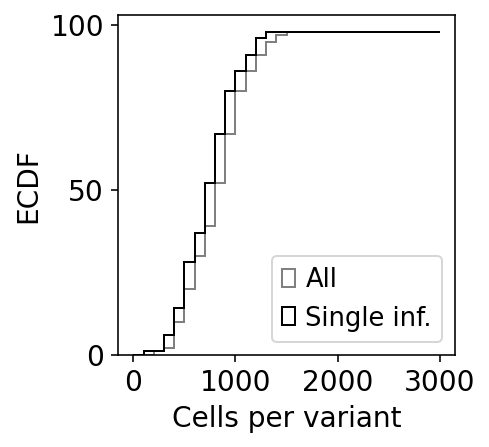

In [29]:
fw=3
fh=3

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
n, bins, patches=plots.hist(cells_per_variant,[0,100,200,300,400,500,600,700,800,900,1000,
                                    1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
                                                   2100,2200,2300,2400,2500,2600,2700,2800,2900,3000],
            cumulative=True,histtype='step',color='gray',label='All') 
patches[0].set_xy(patches[0].get_xy()[:-1])
n, bins, patches=plots.hist(cells_per_variant_singlets,[0,100,200,300,400,500,600,700,800,900,1000,
                                    1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
                                                   2100,2200,2300,2400,2500,2600,2700,2800,2900,3000],
            cumulative=True,histtype='step',label='Single inf.',color='black') 
patches[0].set_xy(patches[0].get_xy()[:-1])
plots.set_xticks([0,1000,2000,3000])
plots.set_yticks([0,50,100])
plots.set_xlabel('Cells per variant')
plots.set_ylabel('ECDF')
#plots.set_title('TP53')
plt.legend(loc='lower right')
plots.grid(False)
plt.savefig(FIGS+'/KRAS.CellsPerVariantECDF.lowMOI.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/KRAS.CellsPerVariantECDF.lowMOI.png',bbox_inches = "tight")


In [31]:
adata_low.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.lowMOI.h5ad')

Re-doing analyses for low MOI dataset
==

In [3]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.lowMOI.h5ad',cache=False)
adata

Only considering the two last: ['.lowMOI', '.h5ad'].
Only considering the two last: ['.lowMOI', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'batch', 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'V112I', 'A130V', 'L19F', 'G13R', 'D30D', 'K5E', 'K176Q', 'Q61K', 'G12V', 'N26Y', 'K117R', 'T127T', 'G13C', 'G12A', 'P34L', 'K117N', 'K179R', 'G12Y', 'G12F', 'E63K', 'G12C', 'Q22K', 'A146V', 'I36M', 'A59E', 'C185Y', 'Q61A', 'T50T', 'M170L', 'K88K', 'T158T', 'R41K', 'T144P', 'V14L', 'T50P', 'K169K', 'A146T', 'S136N', 'G7

In [4]:
variants=list(adata.uns['PS.variant.list'])
variants.append('unassigned')

In [5]:
#scores on original dataset
#get the impactful as the ones called at 1000 cells
SCORE_DIR=DATA+'/'+PROTEIN+'/scoring/scores'
scorefile=SCORE_DIR+'/scores.iter0.cells1000.cells.csv'
scores=pd.read_csv(scorefile,header=0,index_col=0)
scores.head()


avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
G60V           1.253456                 1.237229                  1.269683   
K169K          0.212832                 0.196634                  0.229029   
R135T          0.208239                 0.191273                  0.225206   
G12R           1.826844                 1.815557                  1.838132   
Q61R           1.826356                 1.812848                  1.839864   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
G60V        0.000010       1150.306565              1095.869494   
K169K       0.652089         36.598796                29.903929   
R135T       0.670122         49.667749                41.790037   
G12R        0.000010       6506.519146              6277.833104   
Q61R        0.000010       9063.812541              8729.790179   

       HotellingT2.ci.0.95.high  HotellingT2.q  
G60V                1204.743635       0.000010  
K169K                 43.293664       0.562637  
R135T                 57.545460       0.334641  
G12R                6735.205188       0.000010  
Q61R                9397.834903       0.000010

In [6]:
#score current dataset

#read in the annotation file to add the clusters to it
FDR=0.01
#original anno
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t')

anno.index=anno['Variant']

anno['Position']=anno['Position'].astype('Int32')
anno['Count_pancan']=anno['Count_pancan'].astype('Int32')
anno['Count_ExAC']=anno['Count_ExAC'].astype('Int32')

syn=list(set(anno.loc[anno['control_status']=='synonymous','Variant']).intersection(set(variants)))
print(syn)
impactful=list(set(list(anno.loc[anno['control_status']=='unknown',:].index)).intersection(set(variants)))
print(len(impactful))

#HotellingT2 ========================================
myrng=np.random.RandomState(1234)
adata_sub=perturb.pp.subsample_cells(adata,1000,'variant',rng=myrng)
dataset=pd.DataFrame(adata_sub.obsm['X_pca'][:,:20],
             index=adata_sub.obs_names,
            columns=range(20))
labels=pd.DataFrame({'label':adata_sub.obs['variant']})
labels.index=adata_sub.obs_names


#compute scores and their FDRs
scores_hotel=sc_eVIP.score.compare_groups_with_reference(dataset,
                          labels,
                         variants,
                          syn,
                         methods=['HotellingT2'],
                         n_bootstrap_controls=0)

['K169K', 'T127T', 'T20T', 'D30D', 'D173D', 'WT', 'T50T', 'K88K', 'T158T', 'K178K', 'A66A', 'T74T', 'V8V', 'T144T', 'S17S']
73
Found 15/15 controls
99 %

In [8]:
scores_hotel.to_csv('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/clustering/KRAS.scores.lowMOI.csv')

In [10]:
scores_hotel=pd.read_csv('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/clustering/KRAS.scores.lowMOI.csv',
                        index_col=0)

scores_hotel.head()

HotellingT2.mean  HotellingT2.ci.0.95.low  HotellingT2.ci.0.95.high  \
T127T         28.157864                25.074449                 31.241278   
K176Q         33.609076                29.327384                 37.890768   
R135T         44.602247                37.424052                 51.780442   
K5E          645.929659               613.507581                678.351737   
P34L         644.684867               609.398706                679.971029   

       HotellingT2.q  
T127T       0.666135  
K176Q       0.597143  
R135T       0.430697  
K5E         0.000010  
P34L        0.000010

In [11]:
#find fdr thresholds
method='HotellingT2'

def get_threshold_at_FDR(fdr_data,scorename,signame,FDR=0.1,higher=True):
    fdr_passed=fdr_data.loc[fdr_data[signame]<=FDR,:]
    if higher:
        fdr_passed=fdr_passed.sort_values(by=scorename,ascending=True)
    else:
        fdr_passed=fdr_passed.sort_values(by=scorename,ascending=False)
    score_thresh_value=float(list(fdr_passed[scorename])[0])
    return(score_thresh_value)

t1=get_threshold_at_FDR(scores,scorename=method+'.mean',
                                signame=method+'.q',
                                FDR=0.05)
t2=get_threshold_at_FDR(scores_hotel,scorename=method+'.mean',
                                signame=method+'.q',
                                FDR=0.05)

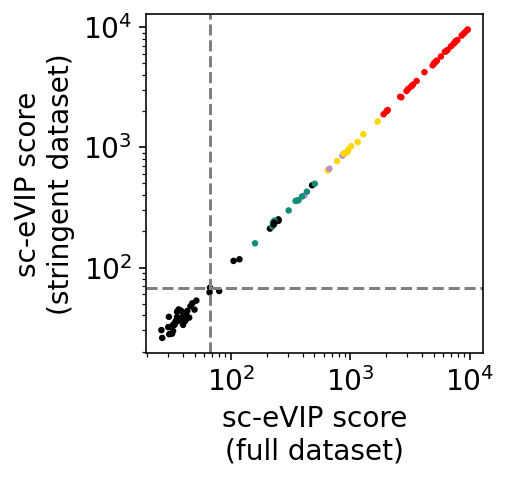

In [12]:
fw=3
fh=3

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)



variants=list(scores_hotel.index)
plots.scatter(scores.loc[variants,method+'.mean'],
           scores_hotel.loc[variants,method+'.mean'],s=5,
           color=anno.loc[variants,'cluster_color'])
plt.grid(False)
plots.set_xlabel('sc-eVIP score\n(full dataset)')
plots.set_ylabel('sc-eVIP score\n(stringent dataset)')

plots.set_xscale('log')
plots.set_yscale('log')

#plots.set_xlim(0,11000)
#plots.set_ylim(0,11000)
plt.axvline(x=t1,linestyle='--',color='gray')
plt.axhline(y=t2,linestyle='--',color='gray')

plt.savefig(FIGS+'/KRAS.scoreComparison.lowMOI.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/KRAS.scoreComparison.lowMOI.png',bbox_inches = "tight")


In [13]:
#get bulk, cluster it
perturb.tl.bulk(adata_sub,'variant')

Trying to set attribute `.obs` of view, copying.


In [14]:
sc_bulk_singles=adata_sub.uns['bulk.variant'].T.loc[:,variants].T

In [15]:
#save bulk for the clustering
res=DATA+'/'+PROTEIN+'/clustering/'+PROTEIN
os.system('mkdir -p '+DATA+'/'+PROTEIN+'/clustering/')
sc_bulk_singles.to_csv(res+'.bulk_2021-03-23.lowMOI.csv')
print(res+'.bulk_2021-03-23.lowMOI.csv')

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/clustering/KRAS.bulk_2021-03-23.lowMOI.csv


In [36]:
f='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/clustering/KRAS.corrL1.sorted_variants_lowMOI.csv'
#cluster info
sorted_variants_df=pd.read_csv(f,header=None)
sorted_variants_df.index=sorted_variants_df[0]
anno['cluster_color']=sorted_variants_df.loc[anno.index,1]
sorted_variants=list(sorted_variants_df[0])
print(sorted_variants)

['T74T', 'I163S', 'G75A', 'M111L', 'T127T', 'R149K', 'T158A', 'V112I', 'K176Q', 'T144T', 'D30D', 'C118S', 'T158T', 'T50T', 'K88K', 'K169K', 'R135T', 'A66A', 'S136N', 'V8V', 'D173D', 'M170L', 'T20T', 'R164Q', 'F141L', 'P110S', 'K178K', 'S17S', 'L159S', 'K179R', 'WT', 'A130V', 'Y166H', 'A155G', 'K147N', 'L79I', 'Q25H', 'G77A', 'V14I', 'T50I', 'K147T', 'E63K', 'E31K', 'Q99E', 'R41K', 'T50P', 'T20R', 'Q22H', 'C185Y', 'T144P', 'T20M', 'L52F', 'T74A', 'D57N', 'D33E', 'L19F', 'unassigned', 'P34L', 'Q61K', 'Q61P', 'G60S', 'K5E', 'P34R', 'R68S', 'N26Y', 'G60D', 'G60V', 'I36M', 'Q22K', 'K117R', 'T58I', 'A59T', 'AG59GV', 'D119G', 'G12Y', 'G12F', 'V14L', 'A59E', 'G12S', 'G12A', 'A59G', 'A146V', 'G13C', 'G12C', 'A146P', 'A146T', 'G12V', 'AG11TD', 'G12D', 'G12I', 'Q61A', 'G12R', 'Q61H', 'Q61R', 'Q61L', 'G13E', 'K117N', 'G13V', 'G13R']


/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


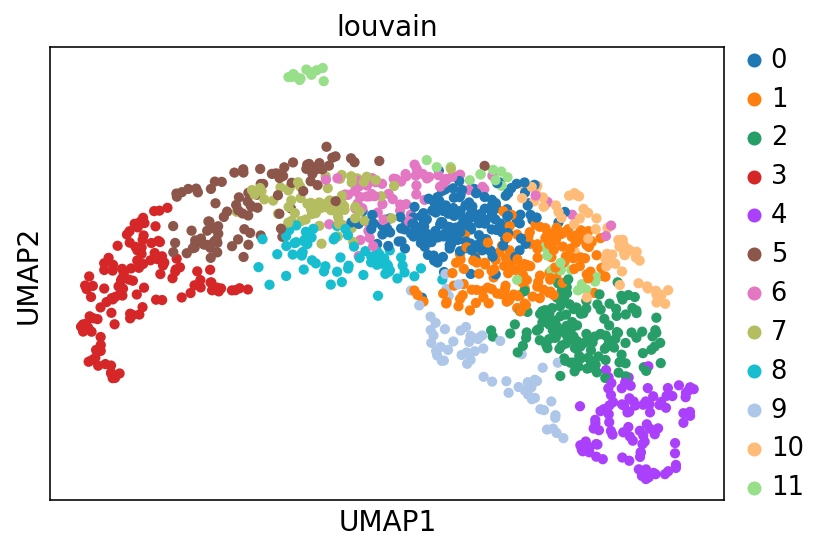

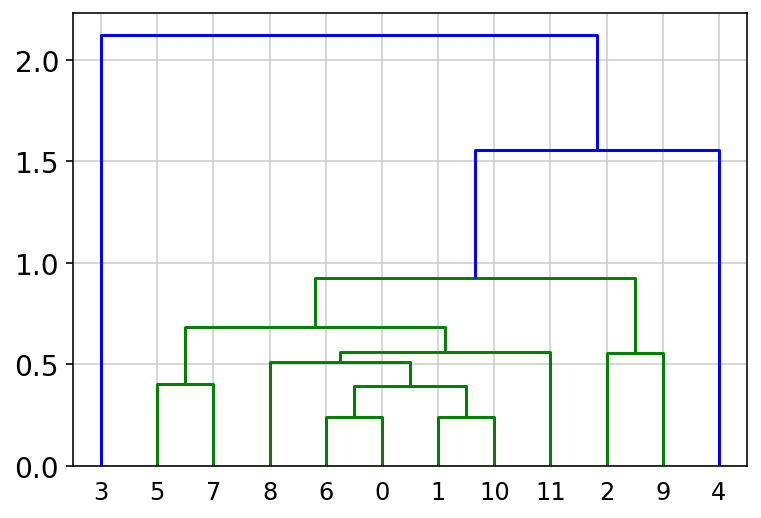

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 8 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


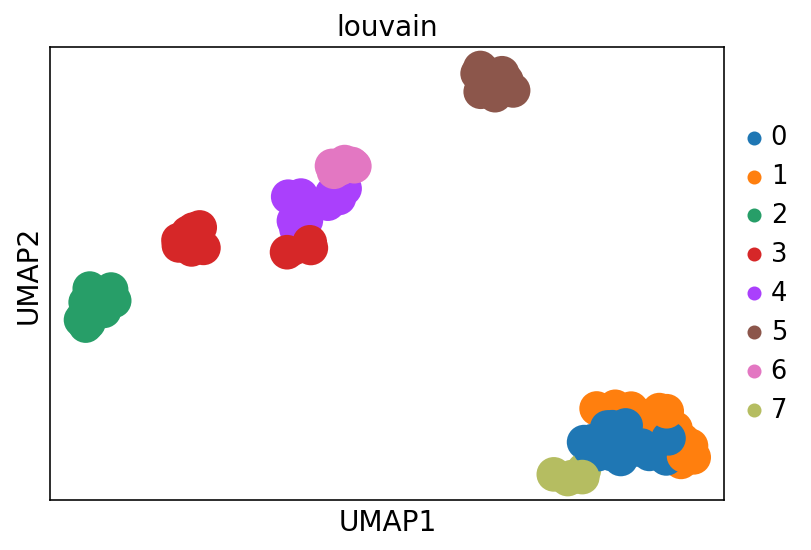

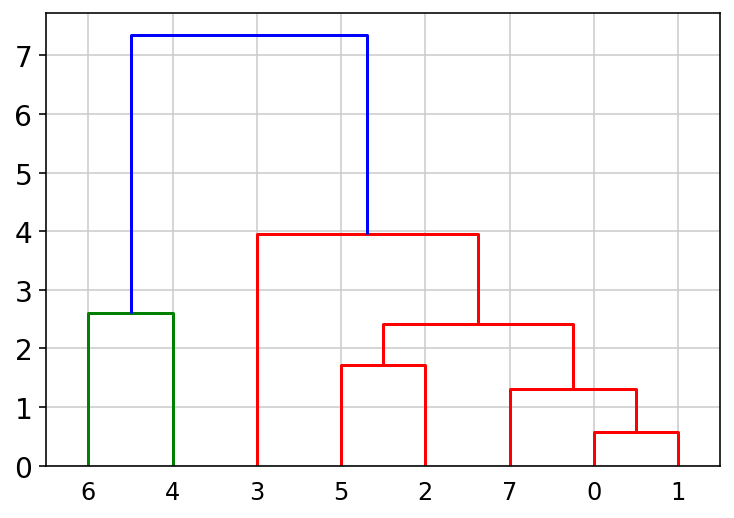

In [17]:
perturb.tl.gene_programs_and_perturbation_modules(adata_sub,input_type='bulk',
                                                  perturbation_name='variant',
                                                  cluster_within=False,
                                                  cmap_programs='Paired')

In [35]:
sorted_variants

['M111L',
 'T127T',
 'S17S',
 'A66A',
 'V112I',
 'R149K',
 'T158T',
 'T144T',
 'A130V',
 'D30D',
 'C118S',
 'T74T',
 'I163S',
 'G75A',
 'WT',
 'T50T',
 'Y166H',
 'A155G',
 'K88K',
 'K176Q',
 'T158A',
 'T20T',
 'D173D',
 'K179R',
 'M170L',
 'V8V',
 'R164Q',
 'K169K',
 'R135T',
 'F141L',
 'P110S',
 'S136N',
 'K178K',
 'L159S',
 'K147N',
 'L79I',
 'Q25H',
 'G77A',
 'V14I',
 'T50I',
 'K147T',
 'E63K',
 'E31K',
 'T50P',
 'Q99E',
 'R41K',
 'T20R',
 'Q22H',
 'C185Y',
 'T20M',
 'T144P',
 'L52F',
 'T74A',
 'D57N',
 'D33E',
 'L19F',
 'unassigned',
 'G60S',
 'Q61P',
 'K5E',
 'Q61K',
 'P34L',
 'P34R',
 'G60D',
 'N26Y',
 'G60V',
 'R68S',
 'I36M',
 'Q22K',
 'K117R',
 'T58I',
 'A59T',
 'AG59GV',
 'D119G',
 'G12Y',
 'G12F',
 'V14L',
 'A59E',
 'G12S',
 'G12A',
 'A59G',
 'A146V',
 'G13C',
 'G12C',
 'A146P',
 'A146T',
 'G12V',
 'AG11TD',
 'G12D',
 'G12I',
 'Q61A',
 'G12R',
 'Q61H',
 'Q61R',
 'Q61L',
 'G13E',
 'K117N',
 'G13V',
 'G13R']

In [38]:
sc_bulk=adata_sub.uns['bulk.variant'].T.loc[adata_sub.var_names,sorted_variants]
sc_bulk['module']=adata_sub.var['bulk.variant.program']
sc_bulk=sc_bulk.sort_values(by='module')
sc_bulk=sc_bulk.drop(columns=['module'])


In [39]:
x=0.25
sns.clustermap(sc_bulk,
               row_cluster=False,col_cluster=False,
               xticklabels=True,
               figsize=(40,16),
               cbar_pos=(0.75, 0.9, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "z-score",
                'ticks':[-x,0,x]},
               cmap='bwr',vmin=-x,vmax=x,
              row_colors=adata_sub.var['bulk.variant.program_color'].astype(str),
               col_colors=anno.loc[:,'cluster_color'])

plt.savefig(FIGS+'/'+PROTEIN+'.regMat.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.regMat.lowMOI.png',bbox_inches = "tight")

In [20]:
corr=perturb.util.corr_mat(sc_bulk.T)

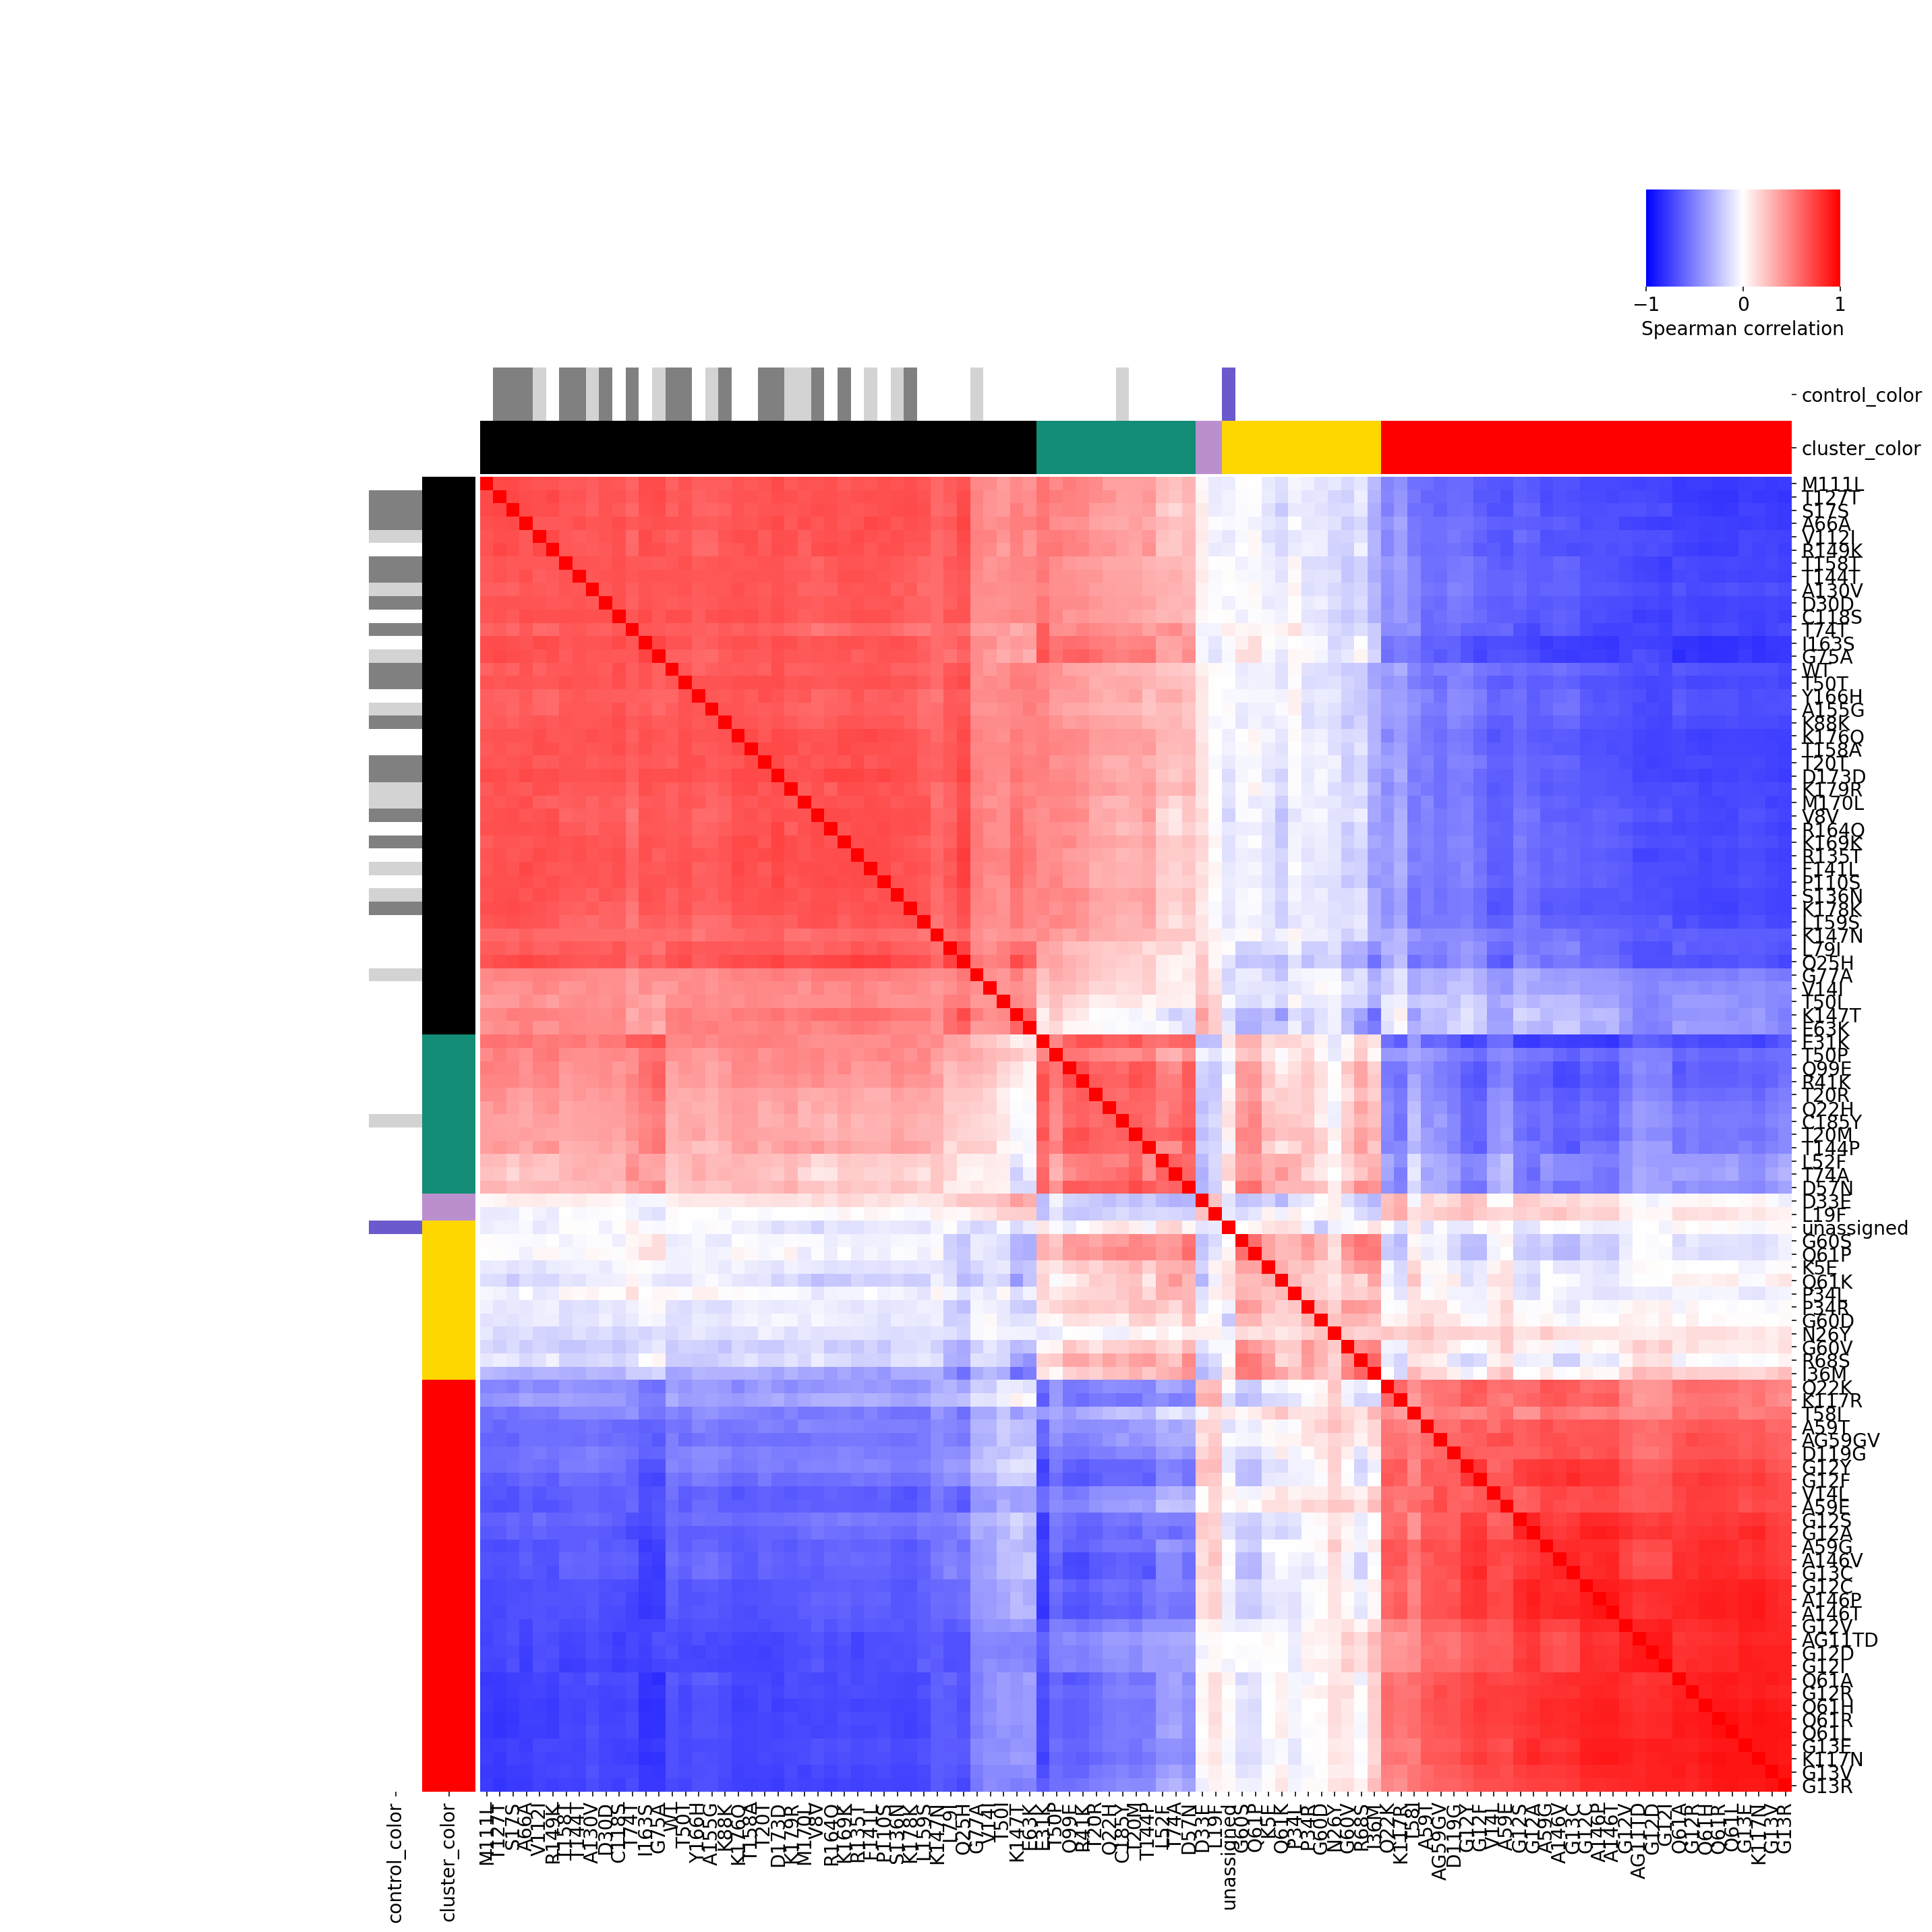

In [21]:
x=1
sns.clustermap(corr.loc[sorted_variants,sorted_variants],
               cmap='bwr',vmin=-x,vmax=x,
               col_cluster=False,row_cluster=False,
              figsize=(20,20),xticklabels=True,yticklabels=True,
               cbar_pos=(0.85, 0.85, 0.1, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "Spearman correlation",
                'ticks':[-x,0,x]},
              row_colors=anno.loc[:,['control_color','cluster_color']],
              col_colors=anno.loc[:,['control_color','cluster_color']])

plt.savefig(FIGS+'/'+PROTEIN+'.corrMat.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.corrMat.lowMOI.png',bbox_inches = "tight")

In [22]:
bulk=sc.AnnData(adata_sub.uns['bulk.variant'].loc[variants,:])
bulk

AnnData object with n_obs × n_vars = 99 × 1145 

In [23]:
sc.tl.pca(bulk,n_comps=50)
sc.pp.neighbors(bulk)
sc.tl.umap(bulk)
sc.tl.louvain(bulk)

computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'cluster' as categorical


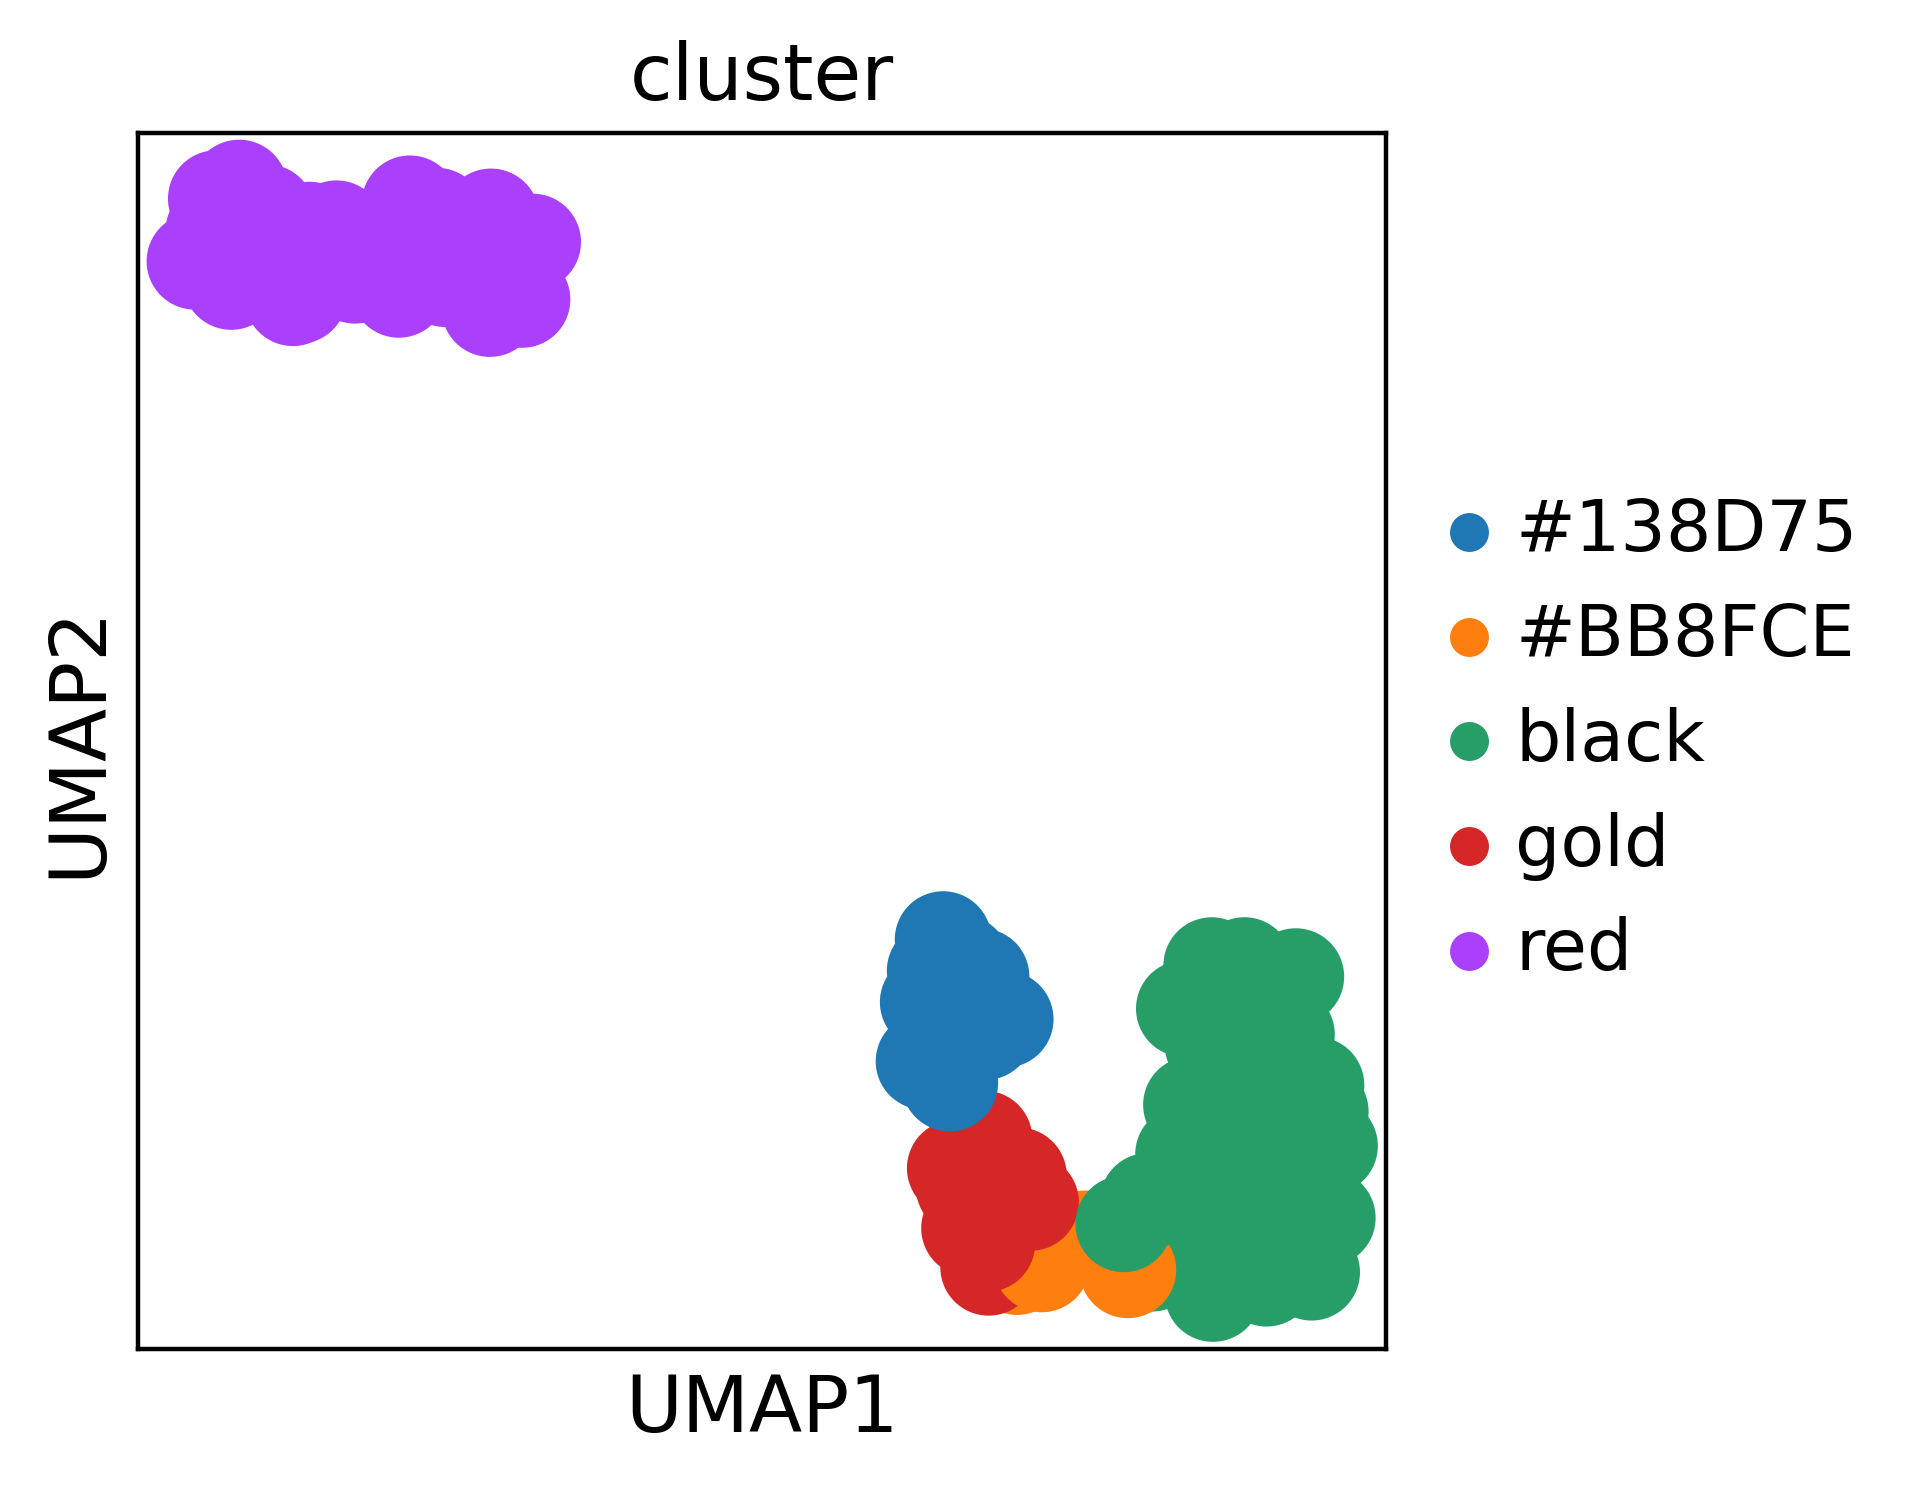

In [24]:
sc.set_figure_params(figsize=(4,4),dpi=200)
bulk.obs['cluster']=anno.loc[bulk.obs_names,'cluster_color2']
sc.pl.umap(bulk,color='cluster')

In [25]:
bulk.uns['cluster_colors']=list(bulk.obs['cluster'].cat.categories)

In [26]:
bulk.write(DATA+'/'+PROTEIN+'.bulk.lowMOI.h5ad')

In [27]:
bulk=sc.read(DATA+'/'+PROTEIN+'.bulk.lowMOI.h5ad')
bulk

Only considering the two last: ['.lowMOI', '.h5ad'].
Only considering the two last: ['.lowMOI', '.h5ad'].


AnnData object with n_obs × n_vars = 99 × 1145 
    obs: 'louvain', 'cluster'
    uns: 'cluster_colors', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

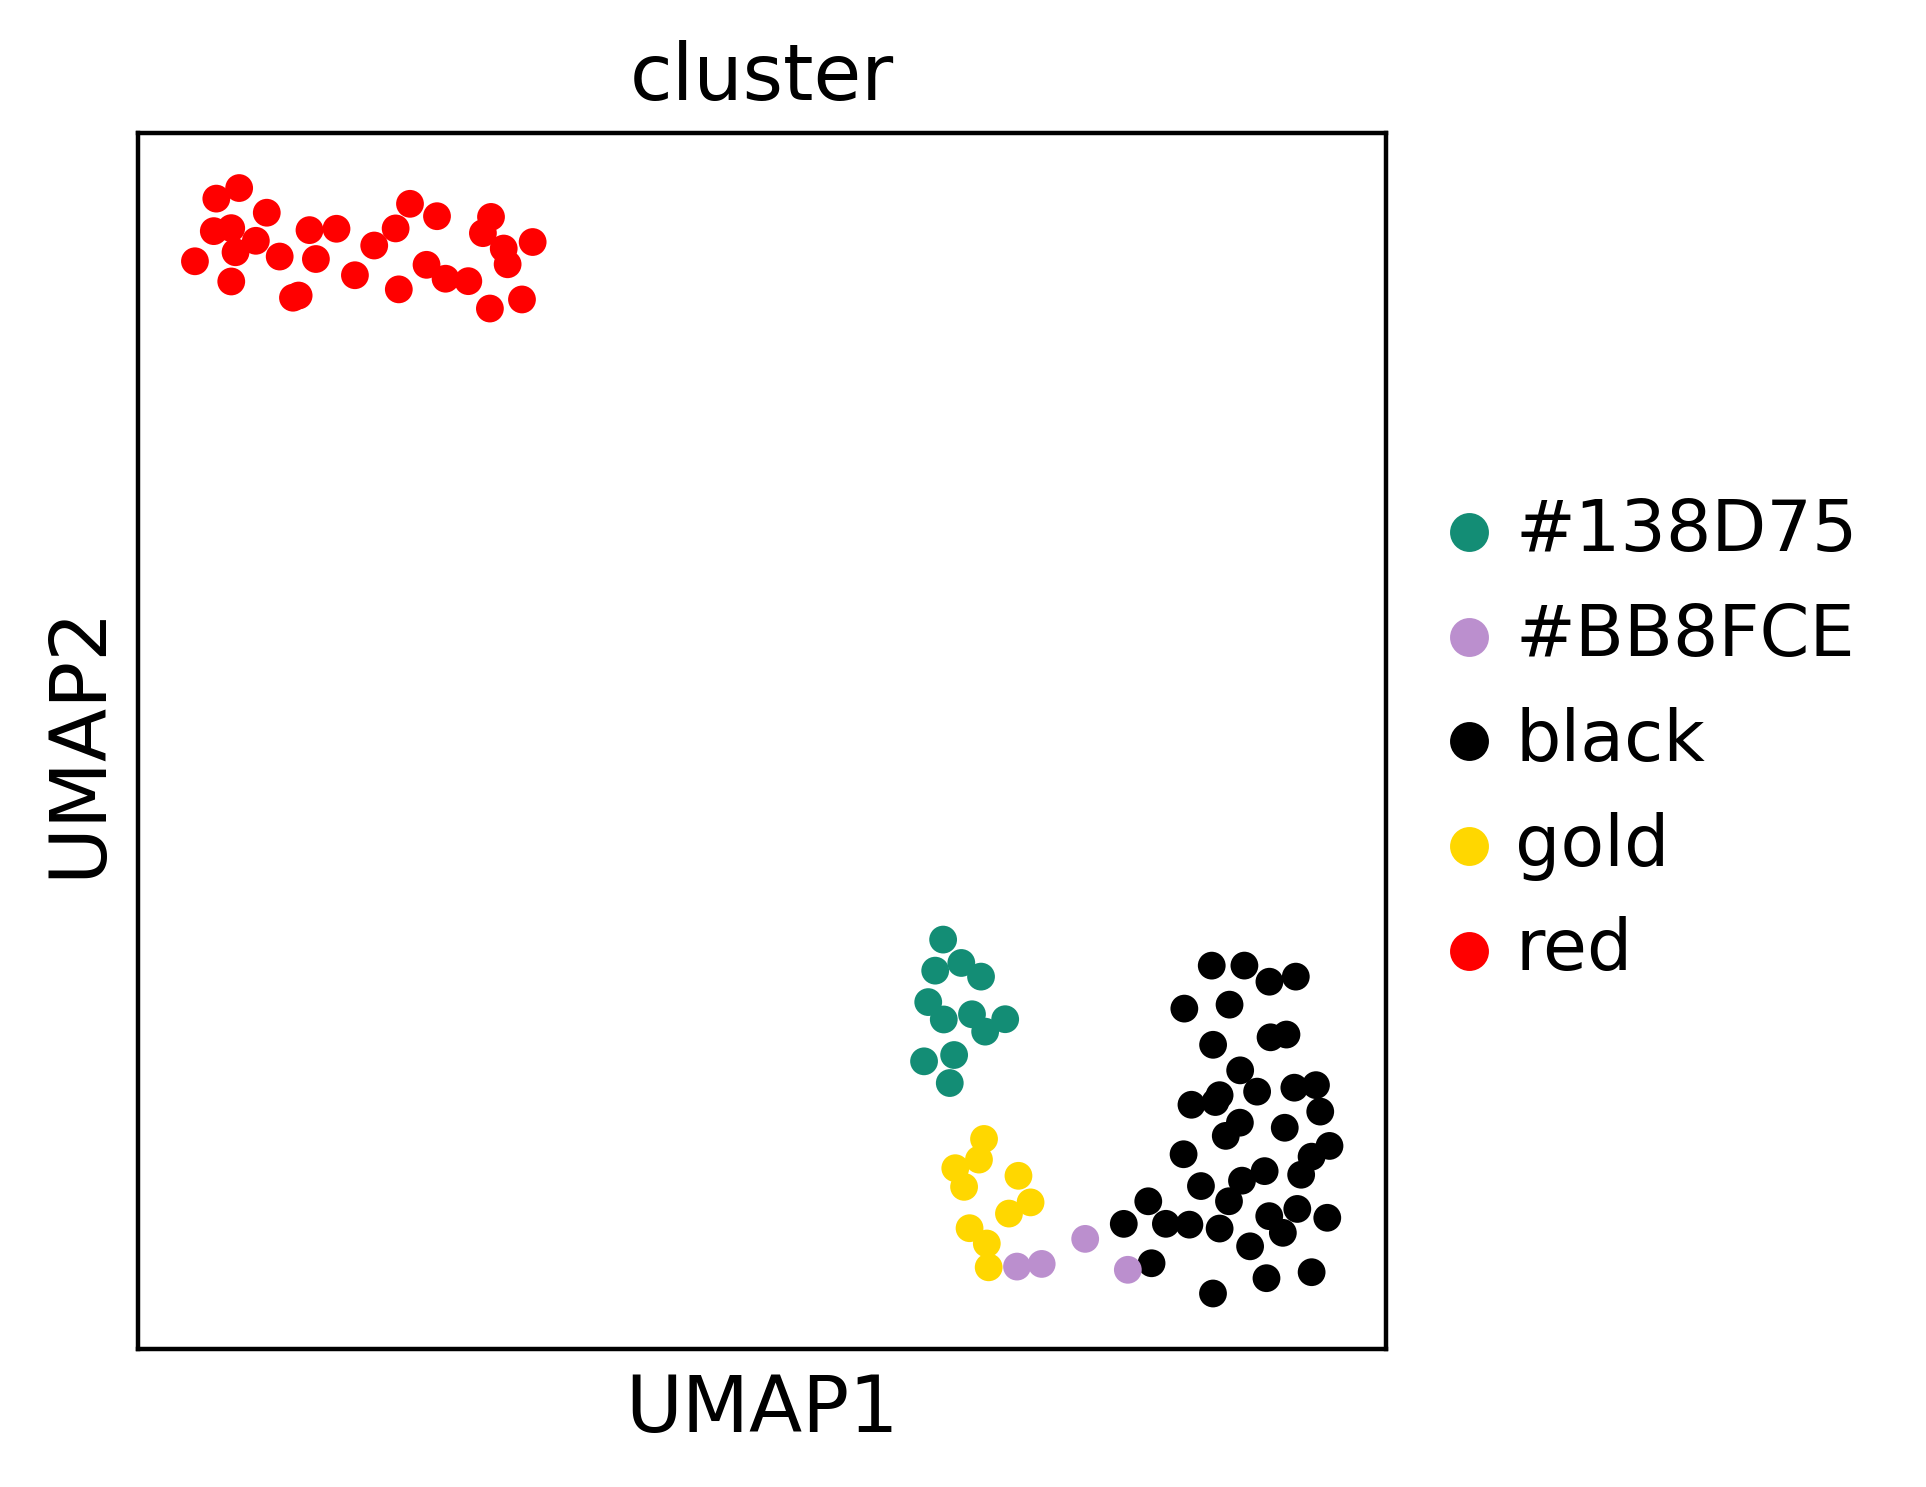

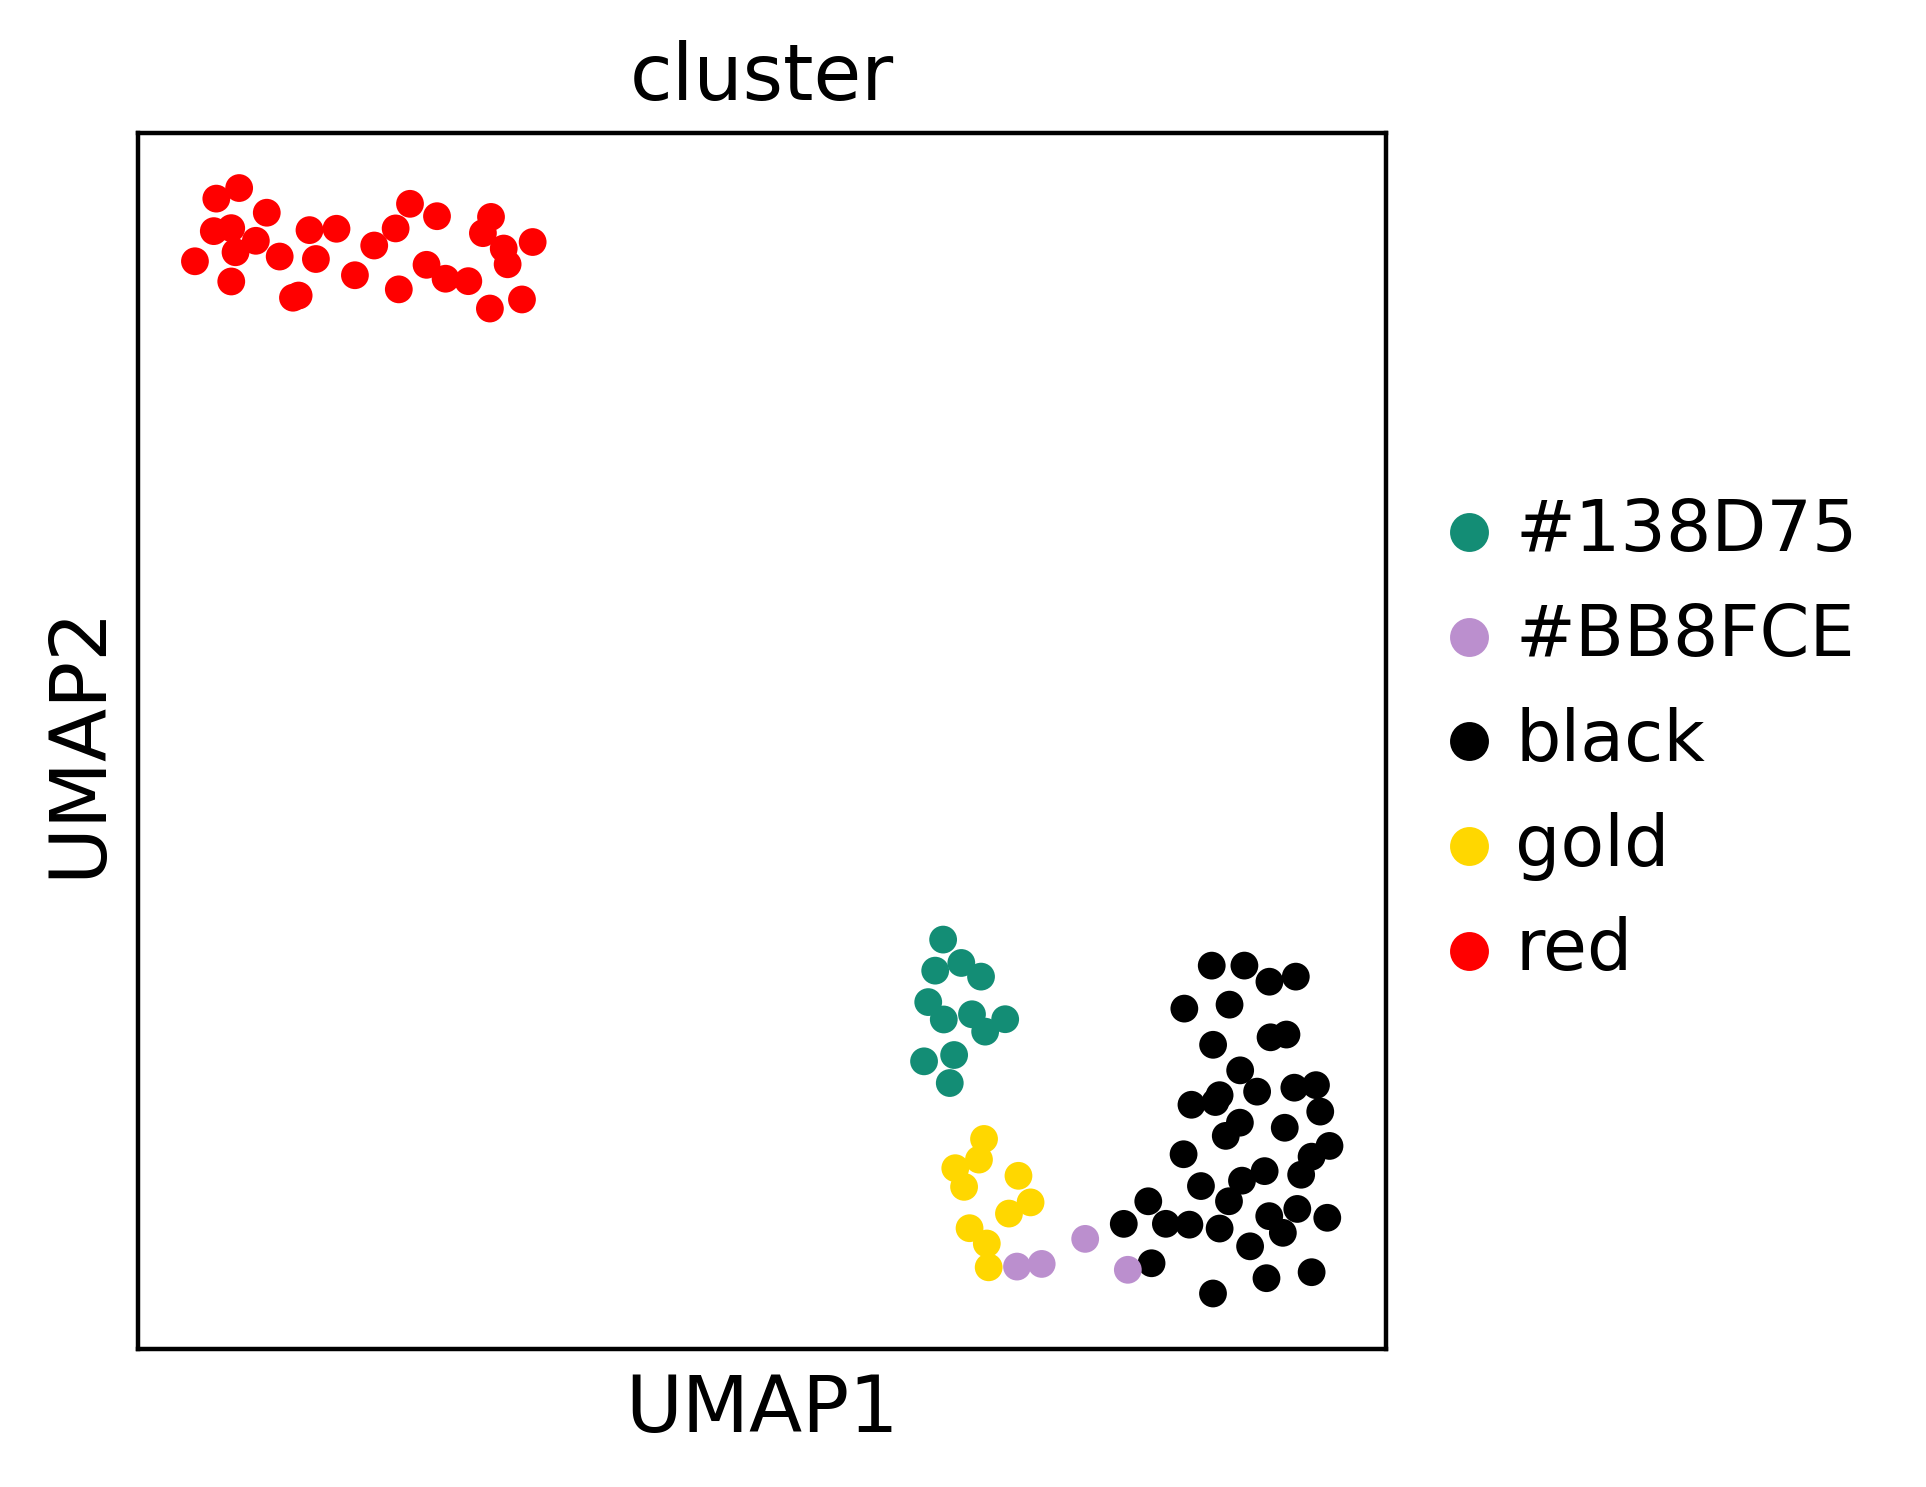

In [28]:
sc.pl.umap(bulk,color=['cluster'],
           s=100,
          save=PROTEIN+'_bulk_umap_lowMOI.png')
sc.pl.umap(bulk,color=['cluster'],
           s=100,
          save=PROTEIN+'_bulk_umap_lowMOI.pdf')

In [108]:
#score more extensively, so we can look for precision and recall

In [29]:
#setup subsampled datasets
SUBS_DIR=DATA+'/'+PROTEIN+'/scoring/subsamples_lowMOI'
os.system('mkdir -p '+SUBS_DIR)

subs_list=[#1000,900,800,700,600,500,400,300,200,
           #190,180,170,160,150,140,130,
    120,110,
           100,90,80,70,60,50,40,30,20,10
          ]
iters=20
for subs in subs_list:
    print(subs)
    for i in range(iters):
        #out file
        out=SUBS_DIR+'/subsample.iter'+str(i)+'.cells'+str(subs)+'.cells.csv'
        
        #subsample
        my_rng=np.random.RandomState(i)
        adata_subs=perturb.pp.subsample_cells(adata,subs,'guide.compact',
                                             rng=my_rng)
        
        #write cells
        cells=pd.DataFrame({'cells':adata_subs.obs_names})
        cells.to_csv(out,index=False,header=False)
    print(out)

120
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/scoring/subsamples_lowMOI/subsample.iter19.cells120.cells.csv
110
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/scoring/subsamples_lowMOI/subsample.iter19.cells110.cells.csv
100
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/scoring/subsamples_lowMOI/subsample.iter19.cells100.cells.csv
90
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/scoring/subsamples_lowMOI/subsample.iter19.cells90.cells.csv
80
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/scoring/subsamples_lowMOI/subsample.iter19.cells80.cells.csv
70
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/scoring/subsample

In [29]:
SUBS_DIR=DATA+'/'+PROTEIN+'/scoring/subsamples_lowMOI'
SCORE_DIR=DATA+'/'+PROTEIN+'/scoring/scores_lowMOI'
os.system('mkdir -p '+SCORE_DIR)

0

In [36]:
for i in range(10):
    print('========',i)
    for subs in [#1000,200,#100,500,
        50,#40,30,20,10,
        1000,900,800,700,600,500,400,300,200,
                 190,180,170,160,150,140,130,120,110,
                 100,90,80,70,60,
                
    ]:
        
        print('cells',subs)
        
        out=SUBS_DIR+'/subsample.iter'+str(i)+'.cells'+str(subs)+'.cells.csv'
        cell_ids=list(pd.read_csv(out).iloc[:,0])

        #get subsample
        adata_sub=adata[cell_ids,:].copy()
        
        #HotellingT2 ========================================
        dataset=pd.DataFrame(adata_sub.obsm['X_pca'][:,:20],
                     index=adata_sub.obs_names,
                    columns=range(20))
        labels=pd.DataFrame({'label':adata_sub.obs['guide.compact']})
        labels.index=adata_sub.obs_names
        
        #compute scores and their FDRs
        scores_hotel=sc_eVIP.score.compare_groups_with_reference(dataset,
                                  labels,
                                 variants,
                                  syn,
                                 methods=['HotellingT2'],
                                 n_bootstrap_controls=0)
        
        #correlation ==========================================
        dataset=pd.DataFrame(adata_sub.X,index=adata_sub.obs_names,
                    columns=adata_sub.var_names)

        scores_corr=sc_eVIP.score.compare_groups_with_reference(dataset,
                                          labels,
                                         variants,
                                          syn,
                                         methods=['avg.pearson'],
                                         n_bootstrap_controls=0) 
        scores_all=scores_corr
        
        for c in scores_hotel.columns:
            if c not in scores_all.columns:
                scores_all[c]=scores_hotel.loc[scores_all.index,c]

        out=SCORE_DIR+'/scores.iter'+str(i)+'.cells'+str(subs)+'.cells.csv'
        scores_all.to_csv(out)

======== 0
cells 50
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 1000
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 900
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 800
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 700
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 600
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 500
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 400
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 300
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 200
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 190
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 180
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 170
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 160
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 150
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 140
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 130
Found 15/15 control

99 %cells 130
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 120
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 110
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 100
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 90
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 80
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 70
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 60
Found 15/15 controls
99 %Found 15/15 controls
99 %======== 6
cells 50
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 1000
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 900
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 800
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 700
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 600
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 500
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 400
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 300
Found 15/15 control

In [30]:
#get the impactful as the ones called at 1000 cells
SCORE_DIR=DATA+'/'+PROTEIN+'/scoring/scores_lowMOI'
scorefile=SCORE_DIR+'/scores.iter0.cells1000.cells.csv'
scores=pd.read_csv(scorefile,header=0,index_col=0)


In [31]:
FDR=0.01
#original anno
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t')

anno.index=anno['Variant']

anno['Position']=anno['Position'].astype('Int32')
anno['Count_pancan']=anno['Count_pancan'].astype('Int32')
anno['Count_ExAC']=anno['Count_ExAC'].astype('Int32')

variants=sorted_variants
syn=list(set(anno.loc[anno['control_status']=='synonymous','Variant']).intersection(set(variants)))
print(syn)
impactful=list(set(list(anno.loc[anno['control_status']=='unknown',:].index)).intersection(set(variants)))
print(len(impactful))

['K169K', 'T127T', 'T20T', 'D30D', 'D173D', 'WT', 'T50T', 'K88K', 'T158T', 'K178K', 'A66A', 'T74T', 'V8V', 'T144T', 'S17S']
73


In [32]:
SUBS_DIR=DATA+'/'+PROTEIN+'/scoring/subsamples_lowMOI'
SCORE_DIR=DATA+'/'+PROTEIN+'/scoring/scores_lowMOI'
os.system('mkdir -p '+SCORE_DIR)

def get_precision_recall(score_df,colname,trues,fdr):
    
    sigs=list(score_df.loc[score_df[colname]<=fdr,:].index)
    print('true',len(trues))
    recall_here=1.0*len(list(set(sigs).intersection(set(trues))))/len(list(trues))
    if len(sigs)==0:
        precision_here=0.0
    else:
        precision_here=1.0*len(list(set(sigs).intersection(set(trues))))/len(sigs)
    return(precision_here,recall_here)

res={}
outs={}
methods=['HotellingT2','avg.pearson']
for method in methods:
    res[method]=pd.DataFrame(columns=['cells','recall','FDR','FP','cluster'])


fdr_total=0.05
thestat='.q'
for i in range(2):
    print(i)
    outs[i]={}
    for subs in [50,#40,30,20,10,
        1000,900,800,700,600,500,400,300,200,
                 190,180,170,160,150,140,130,120,110,
                 100,90,80,70,60,
    ]:
        outs[i][subs]={}
        
        out2=SCORE_DIR+'/scores.iter'+str(i)+'.cells'+str(subs)+'.cells.csv'
        scores_real2=pd.read_csv(out2,index_col=0)
        print(scores_real2.head())

        for fdr in [fdr_total]:

            for method in methods:
                
                #all variants
                #============
                #get impactful variants
                impactful=list(scores.loc[scores[method+thestat]<=fdr,:].index)
                ctrls=list(scores.loc[scores[method+thestat]>fdr,:].index)
                print(method,fdr,'impactful',len(impactful))
                
                pre,rec=get_precision_recall(scores_real2,
                                             method+thestat,
                                             impactful,fdr)
                res_here=pd.DataFrame({'cells':subs,
                                      'recall':rec,
                                      'FDR':fdr,
                                       'cluster':'all',
                                      'FP':1.0-pre},
                                      index=[str(subs)+'.'+str(fdr)+'.'+str(i)])
                res[method]=pd.concat([res[method],res_here])
                
                
                #now, go through each cluster of variants and compute (vs original ctrls)
                for cl in ['#138D75', '#BB8FCE', 'gold', 'red']:
                    print(method,cl,subs)
                    cl_variants=list(anno.loc[anno['cluster_color']==cl,:].index)
                    #print('cl variants',len(cl_variants))
                    #print('ctrls',len(ctrls))
                    cl_variants_sig=list(set(cl_variants).intersection(set(impactful)))
                    variants_here=list(set(cl_variants).union(set(ctrls)))
                    print('variants here',len(variants_here))
                    pre,rec=get_precision_recall(scores_real2.loc[variants_here,:],
                                             method+thestat,
                                             cl_variants_sig,
                                                 fdr)
                    res_here=pd.DataFrame({'cells':subs,
                                      'recall':rec,
                                      'FDR':fdr,
                                       'cluster':cl,
                                      'FP':1.0-pre},
                                      index=[str(subs)+'.'+str(fdr)+'.'+str(i)+'.cl'+cl])
                    print('---')
                    #print('sigs',len(cl_variants_sig))
                    #print('cl',len(cl_variants))
                    #print('ctrls',len(ctrls))
                    #print('fp',1-pre)
                    #print('====')
                    res[method]=pd.concat([res[method],res_here])

0
       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.815789                 0.779521                  0.852058   
P34R           1.047741                 1.031070                  1.064411   
A59E           1.209039                 1.191345                  1.226733   
T158A          0.842218                 0.817059                  0.867376   
R164Q          0.852584                 0.835154                  0.870015   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.718778         34.754836                29.430555   
P34R        0.000010        101.269903                84.091879   
A59E        0.000010        267.862057               233.177870   
T158A       0.645161         31.441626                25.992347   
R164Q       0.644841         27.006472                21.018271   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    40.079118       0.477670  
P34R                 118.447

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.239710                 0.227975                  0.251446   
P34R           1.123266                 1.107132                  1.139401   
A59E           1.730811                 1.718389                  1.743234   
T158A          0.233706                 0.222653                  0.244759   
R164Q          0.221733                 0.202575                  0.240892   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.619683         33.227823                26.569264   
P34R        0.000010        912.633514               871.386328   
A59E        0.000010       3006.342495              2914.927007   
T158A       0.647619         42.051569                35.628250   
R164Q       0.722760         37.600717                28.806163   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    39.886383       0.605495  
P34R                 953.88070

       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.537663                 0.516134                  0.559193   
P34R           0.990162                 0.969196                  1.011127   
A59E           1.481465                 1.455200                  1.507731   
T158A          0.570708                 0.544017                  0.597400   
R164Q          0.517936                 0.490565                  0.545306   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.712207         26.488923                22.515039   
P34R        0.000010        234.600749               211.530392   
A59E        0.000010        831.888243               780.631377   
T158A       0.531010         24.764669                21.480971   
R164Q       0.745067         18.732614                15.628673   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    30.462807       0.454018  
P34R                 257.67110

       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.622154                 0.600921                  0.643386   
P34R           0.992864                 0.976866                  1.008863   
A59E           1.395960                 1.372745                  1.419175   
T158A          0.671810                 0.652443                  0.691177   
R164Q          0.604804                 0.582264                  0.627343   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.653179         32.545031                28.564694   
P34R        0.000010        193.529052               173.870556   
A59E        0.000010        566.085420               528.354578   
T158A       0.363095         27.675151                22.615588   
R164Q       0.737717         16.583144                12.943503   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    36.525369       0.274548  
P34R                 213.18754

       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.728059                 0.700532                  0.755587   
P34R           1.030294                 1.011194                  1.049394   
A59E           1.311667                 1.293646                  1.329687   
T158A          0.738691                 0.718362                  0.759020   
R164Q          0.743848                 0.720744                  0.766951   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.690746         27.985426                23.312851   
P34R        0.000010        137.405174               118.387069   
A59E        0.000010        398.539502               356.070144   
T158A       0.669417         27.223966                21.481177   
R164Q       0.657576         22.019461                18.978058   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    32.658001       0.540793  
P34R                 156.42327

       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.249386                 0.238438                  0.260334   
P34R           1.129356                 1.111661                  1.147052   
A59E           1.713896                 1.703636                  1.724157   
T158A          0.268327                 0.257253                  0.279400   
R164Q          0.254993                 0.239255                  0.270732   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.692593         27.643743                22.863587   
P34R        0.000010        738.095461               703.787350   
A59E        0.000010       2445.437065              2377.679148   
T158A       0.570231         33.330229                28.105699   
R164Q       0.685714         28.770119                23.016703   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    32.423898       0.609059  
P34R                 772.40357

       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.589305                 0.569922                  0.608688   
P34R           1.100471                 1.080257                  1.120686   
A59E           1.443287                 1.429165                  1.457410   
T158A          0.587978                 0.558653                  0.617304   
R164Q          0.551320                 0.532728                  0.569912   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.578426         30.750759                25.606055   
P34R        0.000010        245.376726               232.112261   
A59E        0.000010        618.514310               595.193644   
T158A       0.578426         28.318661                25.383231   
R164Q       0.745865         26.247387                21.964207   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    35.895462       0.448980  
P34R                 258.64119

       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.715334                 0.690061                  0.740608   
P34R           0.982245                 0.961619                  1.002871   
A59E           1.279756                 1.251468                  1.308044   
T158A          0.732249                 0.713067                  0.751432   
R164Q          0.637864                 0.617472                  0.658257   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.723810         19.205081                16.161179   
P34R        0.000010        110.563302                94.699606   
A59E        0.000010        330.344993               303.436409   
T158A       0.646842         22.781163                18.717209   
R164Q       0.809915         31.148730                26.319320   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    22.248983       0.572836  
P34R                 126.42699

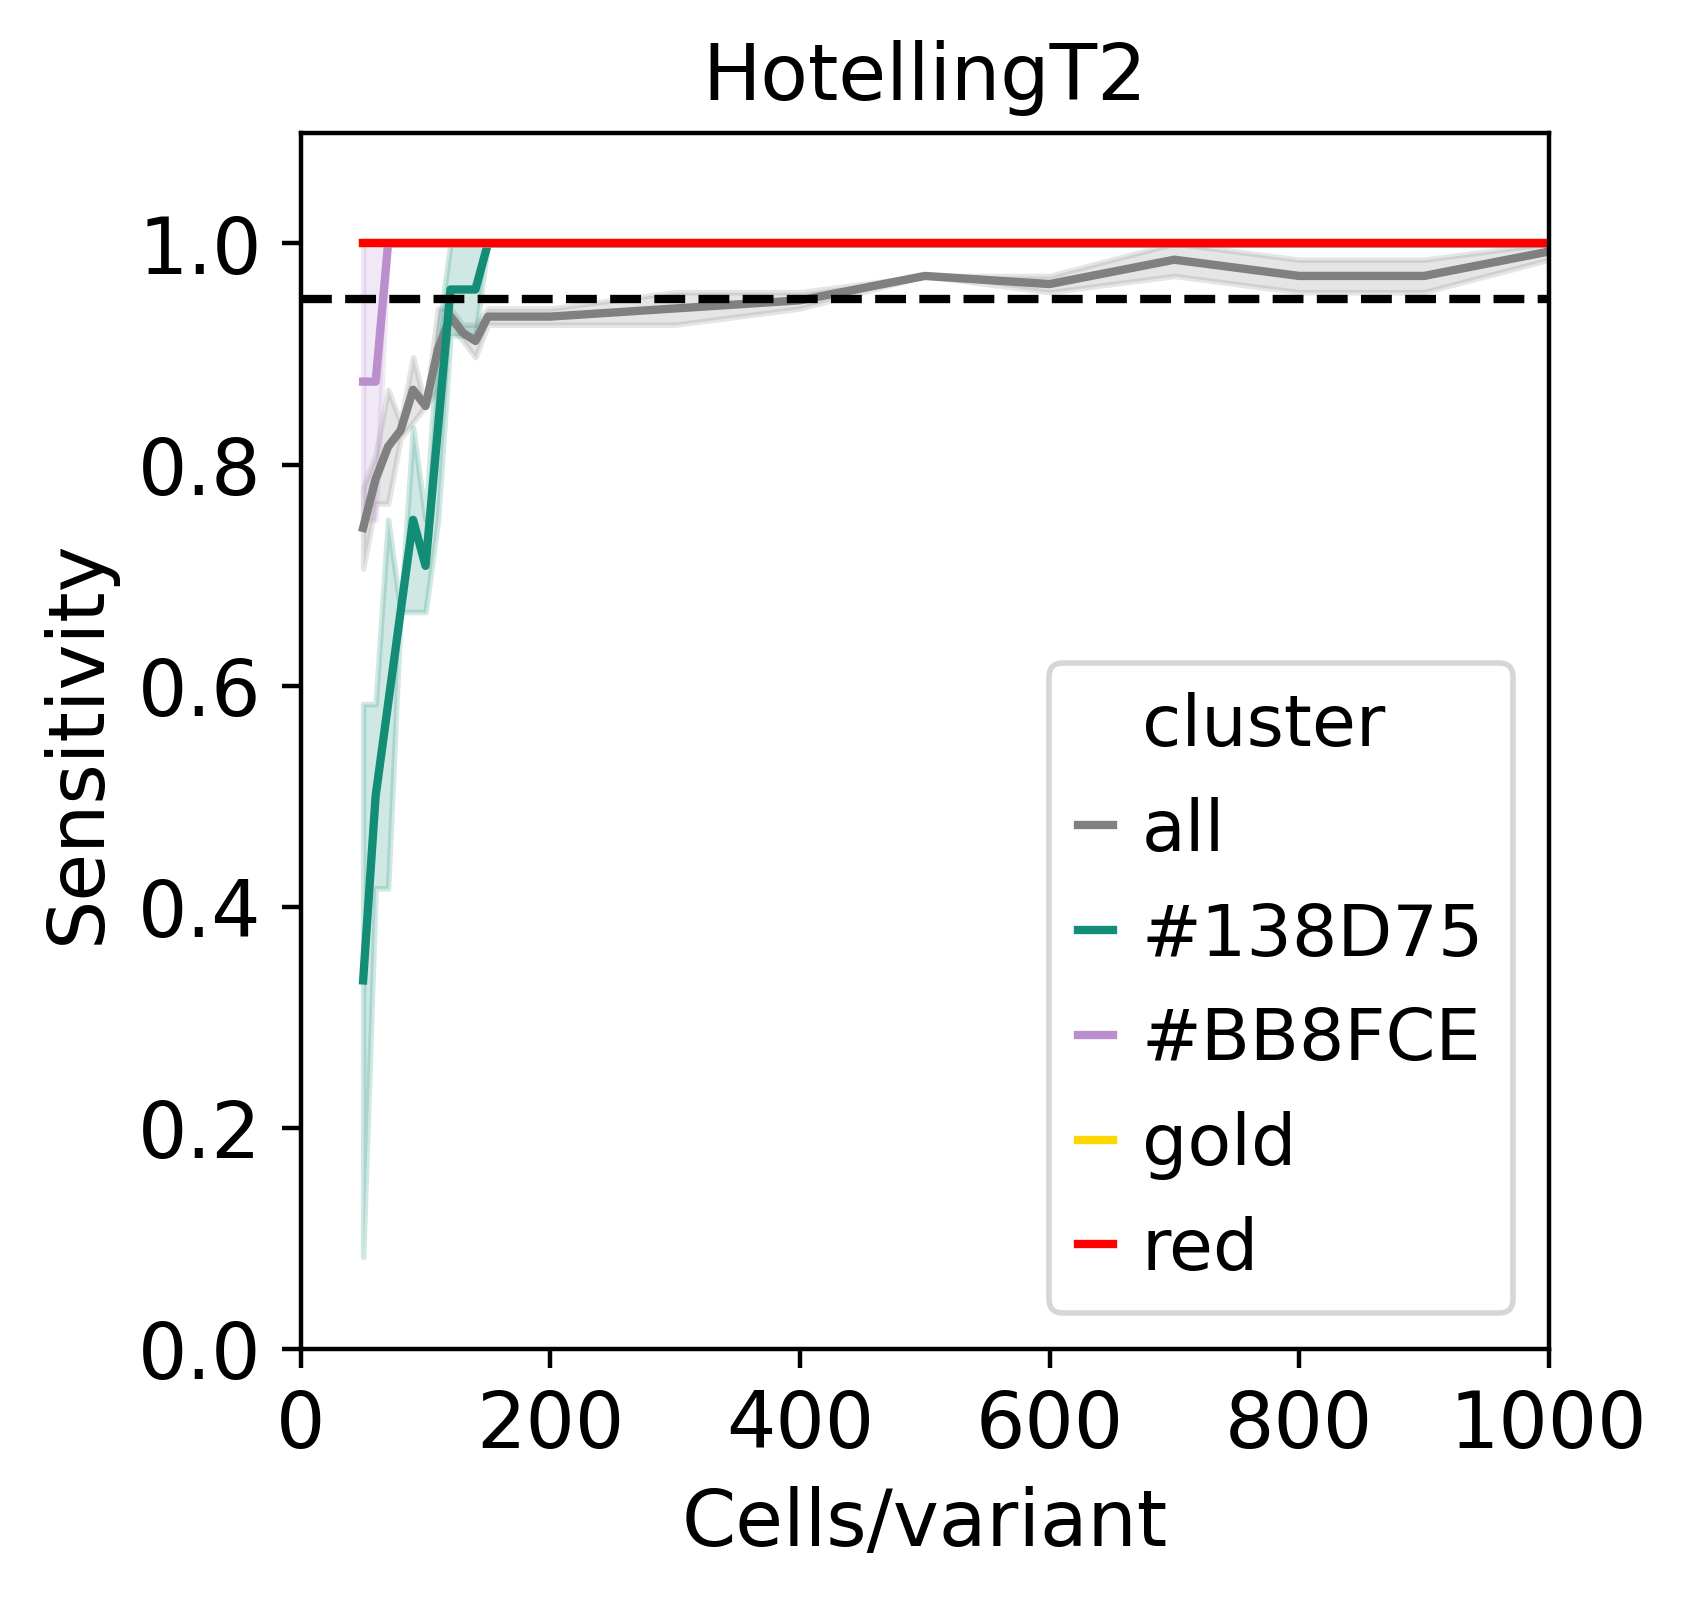

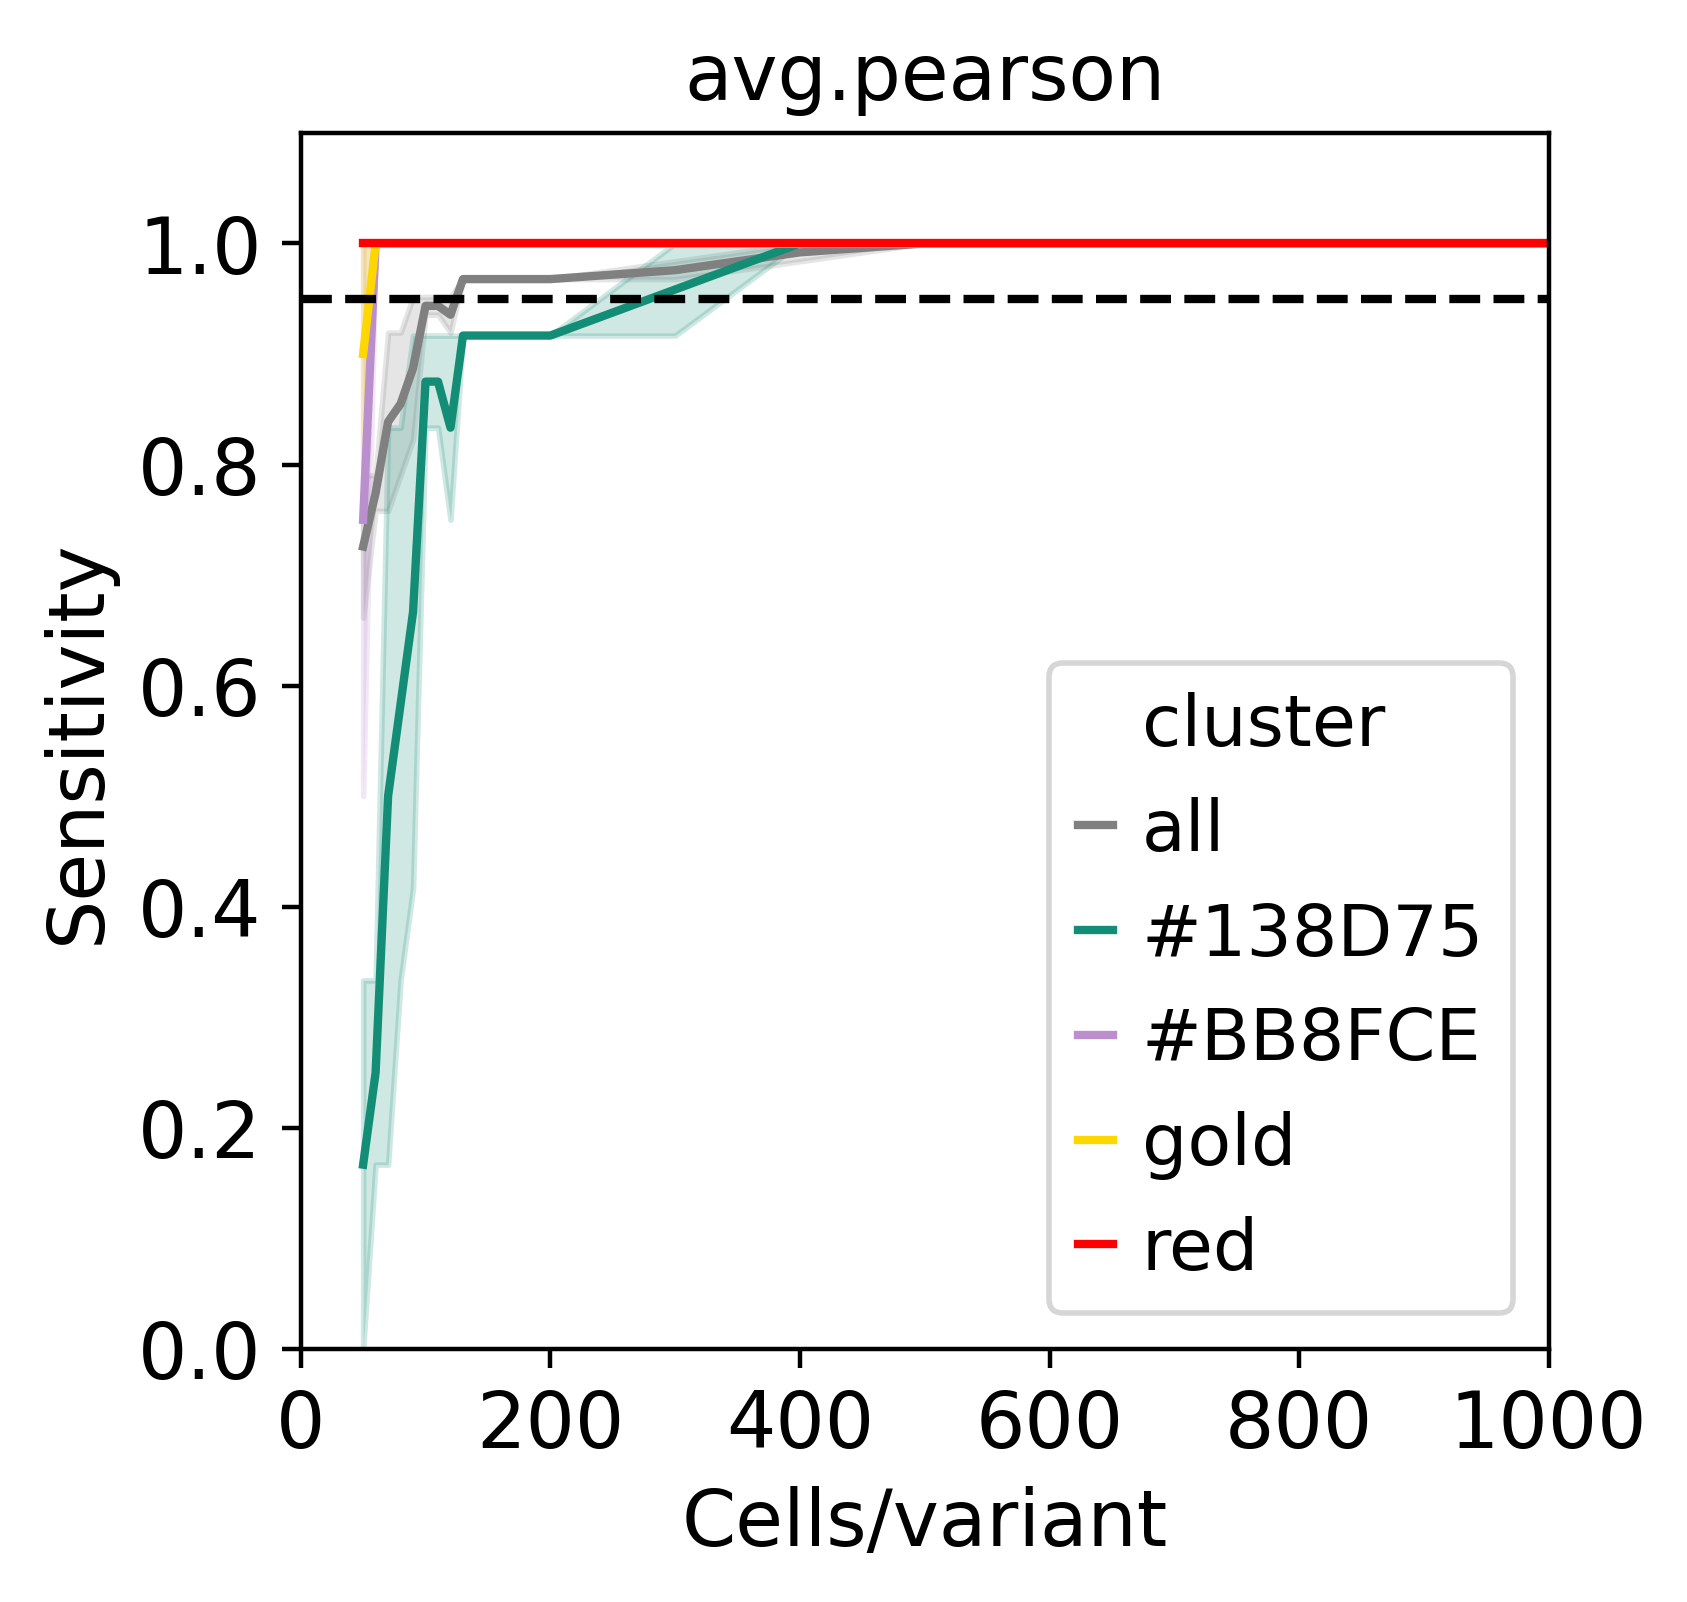

In [34]:
#how to make lines with error bars
method='HotellingT2'

palette={}
for i in ['#138D75', '#BB8FCE', 'black', 'gold', 'red']:
    palette[i]=i
palette['all']='gray'
sns.lineplot(
    data=res[method].loc[res[method]['FDR']==fdr_total,:], 
    x="cells", y="recall",hue='cluster', 
    #cmap='tab20',
    #err_style="bars",
    palette=palette,
    ci=95,
)
plt.ylim(0,1.1)
plt.xlim(0,1000)
plt.axhline(y=0.95,color='black',linestyle='--')
plt.grid(False)
plt.xlabel('Cells/variant')
plt.ylabel('Sensitivity')
plt.title(method)
#plt.axvline(x=100)
#plt.axvline(x=200)
#plt.axvline(x=300)
plt.savefig(FIGS+'/RecallatFDR.'+method+'.'+PROTEIN+'.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/RecallatFDR.'+method+'.'+PROTEIN+'.lowMOI.png',bbox_inches = "tight")
plt.show()

#how to make lines with error bars
method='avg.pearson'

sns.lineplot(
    
    data=res[method].loc[res[method]['FDR']==fdr_total,:], 
    x="cells", y="recall",hue='cluster', 
    #cmap='tab20',
    #err_style="bars",
    palette=palette,
    ci=95,
)
plt.ylim(0,1.1)
plt.grid(False)
plt.xlim(0,1000)
plt.axhline(y=0.95,color='black',linestyle='--')
plt.xlabel('Cells/variant')
plt.ylabel('Sensitivity')
plt.title(method)
plt.savefig(FIGS+'/RecallatFDR.'+method+'.'+PROTEIN+'.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/RecallatFDR.'+method+'.'+PROTEIN+'.lowMOI.png',bbox_inches = "tight")
plt.show()

In [33]:
#how to make lines with error bars
method='HotellingT2'

sns.lineplot(
    data=res[method].loc[res[method]['FDR']==fdr_total,:], 
    x="cells", y="FP",hue='cluster', 
    #cmap='tab20',
    #err_style="bars",
    palette=palette,
    ci=95,
)
plt.ylim(-0.1,0.2)
plt.xlim(0,1000)
plt.grid(False)
plt.xlabel('Cells/variant')
plt.ylabel('Sensitivity')
plt.title(method)
#plt.axvline(x=100)
#plt.axvline(x=200)
#plt.axvline(x=300)
plt.savefig(FIGS+'/FDR.'+method+'.'+PROTEIN+'.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/FDR.'+method+'.'+PROTEIN+'.lowMOI.png',bbox_inches = "tight")
plt.show()


#how to make lines with error bars
method='avg.pearson'

sns.lineplot(
    data=res[method].loc[res[method]['FDR']==fdr_total,:], 
    x="cells", y="FP",hue='cluster', 
    #cmap='tab20',
    #err_style="bars",
    palette=palette,
    ci=95,
)
plt.ylim(-0.1,0.2)
plt.grid(False)
plt.xlim(0,1000)
plt.xlabel('Cells/variant')
plt.ylabel('Sensitivity')
plt.title(method)
plt.savefig(FIGS+'/FDR.'+method+'.'+PROTEIN+'.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/FDR.'+method+'.'+PROTEIN+'.lowMOI.png',bbox_inches = "tight")
plt.show()

NameError: name 'palette' is not defined